<a href="https://colab.research.google.com/github/mesuttguven/Trend-Prediction-on-Stack-Overflow-Dataset/blob/main/Time_Series_Prediction_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Google Drive Baglantisi icin gerekli olan kontroller ve mount islemleri

In [ ]:
# COLAB GOOGLE DRIVE CONNECTION/ MOUNT
try:
  from google.colab import drive
  IN_COLAB=True
except:
  IN_COLAB=False

if IN_COLAB:
  print("We're running Colab")

  # MOUNT
if IN_COLAB:
  # Mount the Google Drive at mount
  mount='/content/gdrive'
  print("Colab: mounting Google drive on ", mount)

  drive.mount(mount)

  # Switch to the directory on the Google Drive that you want to use
  import os
  drive_root = mount + "/My Drive/stackoverflow"
  
  # Create drive_root if it doesn't exist
  create_drive_root = True
  if create_drive_root:
    print("\nColab: making sure ", drive_root, " exists.")
    os.makedirs(drive_root, exist_ok=True)
  
  # Change to the directory
  print("\nColab: Changing directory to ", drive_root)
  %cd $drive_root
print('='*40)
%pwd

We're running Colab
Colab: mounting Google drive on  /content/gdrive
Mounted at /content/gdrive

Colab: making sure  /content/gdrive/My Drive/stackoverflow  exists.

Colab: Changing directory to  /content/gdrive/My Drive/stackoverflow
/content/gdrive/My Drive/stackoverflow


'/content/gdrive/My Drive/stackoverflow'

## Importing Necessary Moduls

In [ ]:
# Import necessary moduls
import tensorflow as tf
from tensorflow import keras
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences

# Import numpy and pandas
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.pyplot import *

## Pre-processing: Extracting the frequency of the asked questions
> hourly_record_python

> hourly_record_ML

> hourly_record_DL

> hourly_record_all_3


In [ ]:
# Readind the csv file
df= pd.read_csv("stack.csv")
tags = df['tags'].values
# Adding target label column
df["tag_label"] = 0

counter = 0
for i in range(0, (len(df) ) ):

  if ( tags[i].find('python') >=  0  ) : 
    
    #print(i)
    counter = counter +1
    using_index=df.iloc[i,10]=1
    

print('The number of the samples which HAVE the [python]:',counter)
print('\n Total sample size / number of asked questions    :', len(df))

# Daily record of the questions which have [python]
df['creation_date'] = pd.to_datetime(df['creation_date'])
df = df.set_index('creation_date') 

hourly_record_python = df.tag_label.resample('H').sum()
print('\n first seven-days long record of the asked questions with [python] tag \n \n ', hourly_record_python[0:7])

The number of the samples which HAVE the [python]: 32026

 Total sample size / number of asked questions    : 32890

 first seven-days long record of the asked questions with [python] tag 
 
  creation_date
2022-04-01 00:00:00    2
2022-04-01 01:00:00    0
2022-04-01 02:00:00    2
2022-04-01 03:00:00    3
2022-04-01 04:00:00    1
2022-04-01 05:00:00    1
2022-04-01 06:00:00    5
Freq: H, Name: tag_label, dtype: int64


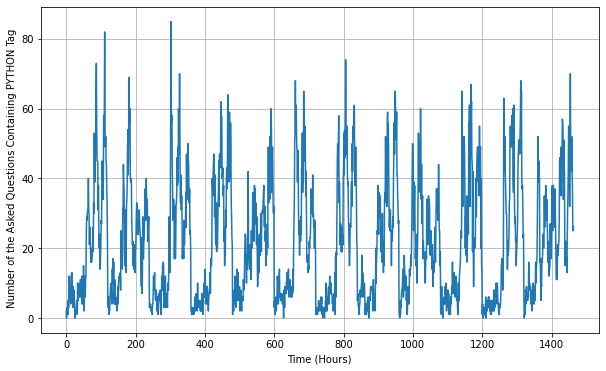

In [ ]:
# RUN FOR PLOTTING SOME GRAPHS
def plot_series(time, series, format="-", start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time (Hours)")
    plt.ylabel(" Number of the Asked Questions Containing PYTHON Tag")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

plt.figure(figsize=(10, 6))
plot_series(np.arange(len(hourly_record_python)), hourly_record_python)

In [ ]:
# Readind the csv file
df= pd.read_csv("stack.csv")
# Adding target label column
df["tag_label"] = 0

counter = 0
for i in range(0, (len(df) ) ):

  if ( tags[i].find('machine-learning') >=  0  ) : 
    
    #print(i)
    counter = counter +1
    using_index=df.iloc[i,10]=1
    

print('The number of the samples which HAVE the [ML]:',counter)
print('\n Total sample size / number of asked questions    :', len(df))

# Daily record of the questions which have [python]
df['creation_date'] = pd.to_datetime(df['creation_date'])
df = df.set_index('creation_date') 

hourly_record_ML = df.tag_label.resample('H').sum()
print('\n first seven-days long record of the asked questions with [ML] tag \n \n ', hourly_record_ML[0:7])

The number of the samples which HAVE the [ML]: 1806

 Total sample size / number of asked questions    : 32890

 first seven-days long record of the asked questions with [ML] tag 
 
  creation_date
2022-04-01 00:00:00    0
2022-04-01 01:00:00    0
2022-04-01 02:00:00    0
2022-04-01 03:00:00    0
2022-04-01 04:00:00    0
2022-04-01 05:00:00    0
2022-04-01 06:00:00    2
Freq: H, Name: tag_label, dtype: int64


In [ ]:
# plt.figure(figsize=(10, 6))
# plot_series(np.arange(len(hourly_record_ML)), hourly_record_ML)

In [ ]:
# Readind the csv file
df= pd.read_csv("stack.csv")
# Adding target label column
df["tag_label"] = 0

counter = 0
for i in range(0, (len(df) ) ):

  if ( tags[i].find('deep-learning') >=  0  ) : 
    
    #print(i)
    counter = counter +1
    using_index=df.iloc[i,10]=1
    

print('The number of the samples which HAVE the [DL]:',counter)
print('\n Total sample size / number of asked questions    :', len(df))

# Daily record of the questions which have [python]
df['creation_date'] = pd.to_datetime(df['creation_date'])
df = df.set_index('creation_date') 

hourly_record_DL = df.tag_label.resample('H').sum()
print('\n first seven-days long record of the asked questions with [ML] tag \n \n ', hourly_record_DL[0:7])

The number of the samples which HAVE the [DL]: 1337

 Total sample size / number of asked questions    : 32890

 first seven-days long record of the asked questions with [ML] tag 
 
  creation_date
2022-04-01 00:00:00    0
2022-04-01 01:00:00    0
2022-04-01 02:00:00    0
2022-04-01 03:00:00    0
2022-04-01 04:00:00    0
2022-04-01 05:00:00    0
2022-04-01 06:00:00    0
Freq: H, Name: tag_label, dtype: int64


In [ ]:
# plt.figure(figsize=(10, 6))
# plot_series(np.arange(len(hourly_record_DL)), hourly_record_DL)

In [ ]:
# Readind the csv file
df= pd.read_csv("stack.csv")
# Adding target label column
df["tag_label"] = 0

counter = 0
for i in range(0, (len(df) ) ):

  if ( tags[i].find('python') >= 0 and tags[i].find('machine-learning') >= 0 and tags[i].find('deep-learning') >= 0 ) : 
    
    #print(i)
    counter = counter +1
    using_index=df.iloc[i,10]=1
    

print('The number of the samples which HAVE the [ALL_3_TAGS_TOGETTER]:',counter)
print('\n Total sample size / number of asked questions    :', len(df))

# Daily record of the questions which have [python]
df['creation_date'] = pd.to_datetime(df['creation_date'])
df = df.set_index('creation_date') 

hourly_record_all_3 = df.tag_label.resample('H').sum()
print('\n first seven-days long record of the asked questions with [ML] tag \n \n ', hourly_record_all_3[0:7])

The number of the samples which HAVE the [ALL_3_TAGS_TOGETTER]: 248

 Total sample size / number of asked questions    : 32890

 first seven-days long record of the asked questions with [ML] tag 
 
  creation_date
2022-04-01 00:00:00    0
2022-04-01 01:00:00    0
2022-04-01 02:00:00    0
2022-04-01 03:00:00    0
2022-04-01 04:00:00    0
2022-04-01 05:00:00    0
2022-04-01 06:00:00    0
Freq: H, Name: tag_label, dtype: int64


In [ ]:
# plt.figure(figsize=(10, 6))
# plot_series(np.arange(len(hourly_record_all_3)), hourly_record_all_3)

## Trend Forecasting with a Linear Model

In [ ]:
def window_dataset(series, window_size, batch_size=32,
                   shuffle_buffer=1000):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.shuffle(shuffle_buffer)
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

### Fixed partitioning into Traning, Validation and Test Sets 10 day test

---



In [ ]:
series = hourly_record_python
time = np.arange(len(hourly_record_python))

split_time = 41*24

# 41 days for training, 67%
time_train = time[:split_time]
x_train = series[:split_time]

# 10 days for validation, 16%
time_valid = time[split_time:51*24]
x_valid = series[split_time:51*24]

# 10 days for test, 16%
time_test = time[51*24:]
x_test = series[51*24:]

In [ ]:
series = hourly_record_python
time = np.arange(len(hourly_record_python))

split_time = 51*24

# 51 days for training, 67%
time_train = time[:split_time]
x_train = series[:split_time]

# 5 days for validation, 16%
time_valid = time[split_time:56*24]
x_valid = series[split_time:56*24]

# 5 days for test, 16%
time_test = time[56*24:]
x_test = series[56*24:]


### Model Ddefinition & Determining the Hyperparameters such Lr=?, etc.


In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 30
train_set = window_dataset(x_train, window_size)
valid_set = window_dataset(x_valid, window_size)

model = keras.models.Sequential([
  keras.layers.Dense(1, input_shape=[window_size])
])
optimizer = keras.optimizers.SGD(learning_rate=1e-5, momentum=0.9)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
model.fit(train_set, epochs=100, validation_data=valid_set)

Epoch 1/100
38/38 [==============================] - 1s 9ms/step - loss: 15.7435 - mae: 16.2326 - val_loss: 18.8737 - val_mae: 19.3696
Epoch 2/100
38/38 [==============================] - 0s 4ms/step - loss: 12.8113 - mae: 13.2996 - val_loss: 16.2019 - val_mae: 16.6955
Epoch 3/100
38/38 [==============================] - 0s 4ms/step - loss: 11.2898 - mae: 11.7735 - val_loss: 14.3103 - val_mae: 14.8035
Epoch 4/100
38/38 [==============================] - 0s 4ms/step - loss: 10.0327 - mae: 10.5190 - val_loss: 12.7366 - val_mae: 13.2319
Epoch 5/100
38/38 [==============================] - 0s 4ms/step - loss: 9.1333 - mae: 9.6156 - val_loss: 11.5670 - val_mae: 12.0552
Epoch 6/100
38/38 [==============================] - 0s 4ms/step - loss: 8.5783 - mae: 9.0646 - val_loss: 10.7509 - val_mae: 11.2404
Epoch 7/100
38/38 [==============================] - 0s 7ms/step - loss: 8.2039 - mae: 8.6899 - val_loss: 10.1957 - val_mae: 10.6907
Epoch 8/100
38/38 [==============================] - 1s 7ms/s

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 30
train_set = window_dataset(x_train, window_size)

model = keras.models.Sequential([
  keras.layers.Dense(1, input_shape=[window_size])
])

lr_schedule = keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-6 * 10**(epoch / 30))
optimizer = keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
38/38 [==============================] - 1s 6ms/step - loss: 28.5214 - mae: 29.0183 - lr: 1.0000e-06
Epoch 2/100
38/38 [==============================] - 0s 3ms/step - loss: 24.5271 - mae: 25.0212 - lr: 1.0798e-06
Epoch 3/100
38/38 [==============================] - 0s 2ms/step - loss: 21.0217 - mae: 21.5152 - lr: 1.1659e-06
Epoch 4/100
38/38 [==============================] - 0s 3ms/step - loss: 18.3571 - mae: 18.8472 - lr: 1.2589e-06
Epoch 5/100
38/38 [==============================] - 0s 2ms/step - loss: 16.5702 - mae: 17.0659 - lr: 1.3594e-06
Epoch 6/100
38/38 [==============================] - 0s 3ms/step - loss: 15.2778 - mae: 15.7640 - lr: 1.4678e-06
Epoch 7/100
38/38 [==============================] - 0s 3ms/step - loss: 14.4015 - mae: 14.8926 - lr: 1.5849e-06
Epoch 8/100
38/38 [==============================] - 0s 3ms/step - loss: 13.7969 - mae: 14.2875 - lr: 1.7113e-06
Epoch 9/100
38/38 [==============================] - 0s 2ms/step - loss: 13.3062 - mae: 13.7959 

(1e-06, 0.001, 0.0, 20.0)

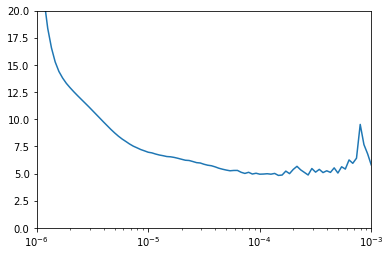

In [ ]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-6, 1e-3, 0, 20])

#### As you can see from the "Lr vs Loss PLOT", we should choose a learning_rate somewhere on the LEFT part of the UNSTABLE PART.

> In this model, we choose the learning_rate=1e-5

> And To mitigate OVERFITTING, We enabled EARLY STOPPING 





In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 30
train_set = window_dataset(x_train, window_size)
valid_set = window_dataset(x_valid, window_size)

model = keras.models.Sequential([
  keras.layers.Dense(1, input_shape=[window_size])
])
optimizer = keras.optimizers.SGD(learning_rate=1e-5, momentum=0.9)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
early_stopping = keras.callbacks.EarlyStopping(patience=10)
model.fit(train_set, epochs=500,
          validation_data=valid_set,
          callbacks=[early_stopping])

Epoch 1/500
38/38 [==============================] - 1s 15ms/step - loss: 16.2033 - mae: 16.6938 - val_loss: 16.0996 - val_mae: 16.5846
Epoch 2/500
38/38 [==============================] - 0s 7ms/step - loss: 12.0194 - mae: 12.5054 - val_loss: 13.9785 - val_mae: 14.4686
Epoch 3/500
38/38 [==============================] - 0s 6ms/step - loss: 10.6733 - mae: 11.1565 - val_loss: 12.3806 - val_mae: 12.8614
Epoch 4/500
38/38 [==============================] - 1s 8ms/step - loss: 9.6204 - mae: 10.1021 - val_loss: 11.4092 - val_mae: 11.8931
Epoch 5/500
38/38 [==============================] - 0s 4ms/step - loss: 8.8882 - mae: 9.3692 - val_loss: 10.8604 - val_mae: 11.3511
Epoch 6/500
38/38 [==============================] - 0s 4ms/step - loss: 8.4050 - mae: 8.8872 - val_loss: 10.5445 - val_mae: 11.0387
Epoch 7/500
38/38 [==============================] - 0s 4ms/step - loss: 8.0788 - mae: 8.5619 - val_loss: 10.3175 - val_mae: 10.8019
Epoch 8/500
38/38 [==============================] - 0s 4ms/s

In [ ]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [ ]:
lin_forecast = model_forecast(model, series[(split_time + 5*24) - window_size:-1], window_size)[:, 0]

4/4 [==============================] - 0s 12ms/step


In [ ]:
lin_forecast.shape

(120,)

#### For the Last Ten (10) Days, the model's prediction performance was tested on data which it has never seen before.
> If we want to find the first day prediction result of the test set, the day 52, we shoul just give the input such as;


> lin_forecast = model_forecast(model, series[(split_time + 10*24) - window_size:(split_time + 11*24)-1], window_size)[:, 0]









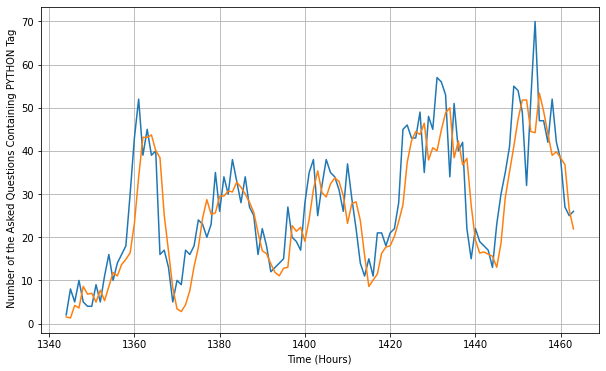

In [ ]:
plt.figure(figsize=(10, 6))
plot_series(time_test, x_test)
plot_series(time_test, lin_forecast)
# plotting REAL TEST Values (BLUE) over PREDICTED Values (Orange)

In [ ]:
keras.metrics.mean_absolute_error(x_test, lin_forecast).numpy()

6.0987988

## Trend Forecasting with a Dense Model

In [ ]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [ ]:
def window_dataset(series, window_size, batch_size=32,
                   shuffle_buffer=1000):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.shuffle(shuffle_buffer)
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

In [ ]:
series = hourly_record_python
time = np.arange(len(hourly_record_python))

split_time = 51*24

# 51 days for training, 67%
time_train = time[:split_time]
x_train = series[:split_time]

# 5 days for validation, 16%
time_valid = time[split_time:56*24]
x_valid = series[split_time:56*24]

# 5 days for test, 16%
time_test = time[56*24:]
x_test = series[56*24:]

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 30
train_set = window_dataset(x_train, window_size)

model = keras.models.Sequential([
  keras.layers.Dense(10, activation="relu", input_shape=[window_size]),
  keras.layers.Dense(10, activation="relu"),
  keras.layers.Dense(1)
])

lr_schedule = keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-7 * 10**(epoch / 20))
optimizer = keras.optimizers.SGD(learning_rate=1e-7, momentum=0.9)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
38/38 [==============================] - 1s 4ms/step - loss: 17.2726 - mae: 17.7634 - lr: 1.0000e-07
Epoch 2/100
38/38 [==============================] - 0s 3ms/step - loss: 17.1452 - mae: 17.6364 - lr: 1.1220e-07
Epoch 3/100
38/38 [==============================] - 0s 3ms/step - loss: 16.9991 - mae: 17.4908 - lr: 1.2589e-07
Epoch 4/100
38/38 [==============================] - 0s 3ms/step - loss: 16.8427 - mae: 17.3350 - lr: 1.4125e-07
Epoch 5/100
38/38 [==============================] - 0s 3ms/step - loss: 16.6793 - mae: 17.1712 - lr: 1.5849e-07
Epoch 6/100
38/38 [==============================] - 0s 3ms/step - loss: 16.4995 - mae: 16.9914 - lr: 1.7783e-07
Epoch 7/100
38/38 [==============================] - 0s 3ms/step - loss: 16.3125 - mae: 16.8033 - lr: 1.9953e-07
Epoch 8/100
38/38 [==============================] - 0s 3ms/step - loss: 16.1180 - mae: 16.6083 - lr: 2.2387e-07
Epoch 9/100
38/38 [==============================] - 0s 3ms/step - loss: 15.9173 - mae: 16.4081 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                310       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 431
Trainable params: 431
Non-trainable params: 0
_________________________________________________________________


(1e-07, 0.005, 0.0, 30.0)

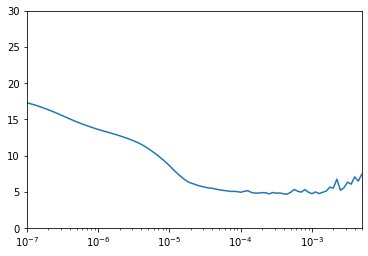

In [ ]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-7, 5e-3, 0, 30])

#### learning_rate=10e-4 since loss decreases in a stable manner.

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 30
train_set = window_dataset(x_train, window_size)
valid_set = window_dataset(x_valid, window_size)

model = keras.models.Sequential([
  keras.layers.Dense(10, activation="relu", input_shape=[window_size]),
  keras.layers.Dense(10, activation="relu"),
  keras.layers.Dense(1)
])

optimizer = keras.optimizers.SGD(learning_rate=1e-4, momentum=0.9)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
early_stopping = keras.callbacks.EarlyStopping(patience=10)
model.fit(train_set, epochs=500,
          validation_data=valid_set,
          callbacks=[early_stopping])

Epoch 1/500
38/38 [==============================] - 3s 11ms/step - loss: 8.1402 - mae: 8.6207 - val_loss: 8.6294 - val_mae: 9.1091
Epoch 2/500
38/38 [==============================] - 0s 5ms/step - loss: 6.3423 - mae: 6.8216 - val_loss: 8.5871 - val_mae: 9.0798
Epoch 3/500
38/38 [==============================] - 0s 5ms/step - loss: 5.9586 - mae: 6.4354 - val_loss: 7.2535 - val_mae: 7.7406
Epoch 4/500
38/38 [==============================] - 0s 4ms/step - loss: 5.6320 - mae: 6.1078 - val_loss: 7.2235 - val_mae: 7.7110
Epoch 5/500
38/38 [==============================] - 0s 4ms/step - loss: 5.3212 - mae: 5.7931 - val_loss: 6.6032 - val_mae: 7.0914
Epoch 6/500
38/38 [==============================] - 0s 4ms/step - loss: 5.2579 - mae: 5.7320 - val_loss: 6.4107 - val_mae: 6.8922
Epoch 7/500
38/38 [==============================] - 0s 4ms/step - loss: 5.1368 - mae: 5.6122 - val_loss: 6.5594 - val_mae: 7.0511
Epoch 8/500
38/38 [==============================] - 0s 4ms/step - loss: 5.1861 - 

In [ ]:
dense_forecast = model_forecast(
    model,
    series[ ( split_time + 5*24) - window_size:-1],
    window_size)[:, 0]

4/4 [==============================] - 7s 12ms/step


In [ ]:
len(dense_forecast)

120

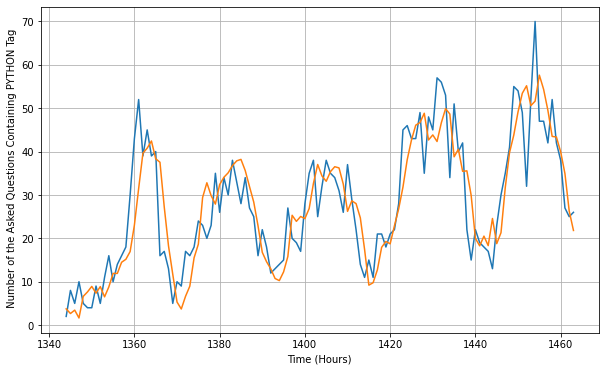

In [ ]:
plt.figure(figsize=(10, 6))
plot_series(time_test, x_test)
plot_series(time_test, dense_forecast)

In [ ]:
keras.metrics.mean_absolute_error(x_test, dense_forecast).numpy()

5.9691405

## Trend Forecasting with a Simple RNN

>


In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 30
train_set = window_dataset(x_train, window_size, batch_size=128)

model = keras.models.Sequential([
  keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
  keras.layers.SimpleRNN(100, return_sequences=True),
  keras.layers.SimpleRNN(100),
  keras.layers.Dense(1),
  keras.layers.Lambda(lambda x: x * 200.0)
])
lr_schedule = keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-7 * 10**(epoch / 20))
optimizer = keras.optimizers.SGD(learning_rate=1e-7, momentum=0.9)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
10/10 [==============================] - 3s 65ms/step - loss: 124.8282 - mae: 125.3281 - lr: 1.0000e-07
Epoch 2/100
10/10 [==============================] - 0s 37ms/step - loss: 75.1645 - mae: 75.6617 - lr: 1.1220e-07
Epoch 3/100
10/10 [==============================] - 1s 36ms/step - loss: 61.1870 - mae: 61.6864 - lr: 1.2589e-07
Epoch 4/100
10/10 [==============================] - 0s 36ms/step - loss: 52.2891 - mae: 52.7875 - lr: 1.4125e-07
Epoch 5/100
10/10 [==============================] - 0s 35ms/step - loss: 43.5816 - mae: 44.0780 - lr: 1.5849e-07
Epoch 6/100
10/10 [==============================] - 1s 36ms/step - loss: 37.9709 - mae: 38.4666 - lr: 1.7783e-07
Epoch 7/100
10/10 [==============================] - 0s 36ms/step - loss: 33.6740 - mae: 34.1692 - lr: 1.9953e-07
Epoch 8/100
10/10 [==============================] - 1s 35ms/step - loss: 30.4517 - mae: 30.9480 - lr: 2.2387e-07
Epoch 9/100
10/10 [==============================] - 1s 37ms/step - loss: 27.6972 - ma

(1e-07, 0.0001, 0.0, 30.0)

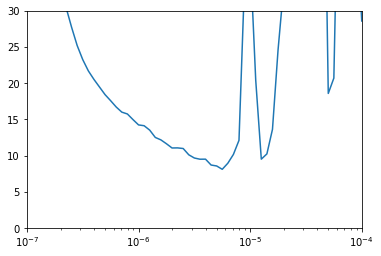

In [ ]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-7, 1e-4, 0, 30])

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 30
train_set = window_dataset(x_train, window_size, batch_size=128)
valid_set = window_dataset(x_valid, window_size, batch_size=128)

model = keras.models.Sequential([
  keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
  keras.layers.SimpleRNN(100, return_sequences=True),
  keras.layers.SimpleRNN(100),
  keras.layers.Dense(1),
  keras.layers.Lambda(lambda x: x * 200.0)
])
optimizer = keras.optimizers.SGD(learning_rate= 6e-6, momentum=0.9)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
early_stopping = keras.callbacks.EarlyStopping(patience=50)
model_checkpoint = keras.callbacks.ModelCheckpoint(
    "my_checkpoint", save_best_only=True)
model.fit(train_set, epochs=500,
          validation_data=valid_set,
          callbacks=[early_stopping, model_checkpoint])

Epoch 1/500
      9/Unknown - 2s 38ms/step - loss: 24.1623 - mae: 24.6552

10/10 [==============================] - 6s 453ms/step - loss: 23.9024 - mae: 24.3954 - val_loss: 19.1929 - val_mae: 19.6874
Epoch 2/500
 9/10 [==========================>...] - ETA: 0s - loss: 21.0391 - mae: 21.5347

10/10 [==============================] - 4s 423ms/step - loss: 21.2828 - mae: 21.7785 - val_loss: 14.9719 - val_mae: 15.4667
Epoch 3/500
10/10 [==============================] - 1s 41ms/step - loss: 16.1326 - mae: 16.6258 - val_loss: 24.4445 - val_mae: 24.9425
Epoch 4/500
10/10 [==============================] - 1s 42ms/step - loss: 16.2800 - mae: 16.7770 - val_loss: 21.6226 - val_mae: 22.1226
Epoch 5/500
 9/10 [==========================>...] - ETA: 0s - loss: 17.6475 - mae: 18.1435

10/10 [==============================] - 4s 448ms/step - loss: 17.5170 - mae: 18.0129 - val_loss: 12.2225 - val_mae: 12.7112
Epoch 6/500
10/10 [==============================] - 1s 42ms/step - loss: 12.2295 - mae: 12.7201 - val_loss: 21.3233 - val_mae: 21.8162
Epoch 7/500
10/10 [==============================] - 1s 43ms/step - loss: 15.4036 - mae: 15.8982 - val_loss: 13.4002 - val_mae: 13.8888
Epoch 8/500
10/10 [==============================] - 1s 42ms/step - loss: 11.8620 - mae: 12.3549 - val_loss: 14.2022 - val_mae: 14.6990
Epoch 9/500
10/10 [==============================] - 2s 79ms/step - loss: 13.6633 - mae: 14.1579 - val_loss: 13.3195 - val_mae: 13.8064
Epoch 10/500
10/10 [==============================] - 1s 68ms/step - loss: 11.1195 - mae: 11.6119 - val_loss: 17.6181 - val_mae: 18.1173
Epoch 11/500
10/10 [==============================] - 1s 49ms/step - loss: 11.9638 - mae: 12.4574 - val_loss: 14.8510 - val_mae: 15.3500
Epoch 12/500
 9/10 [==========================>...] - ETA

10/10 [==============================] - 3s 362ms/step - loss: 13.6448 - mae: 14.1386 - val_loss: 9.4073 - val_mae: 9.8995
Epoch 13/500
10/10 [==============================] - 1s 42ms/step - loss: 8.8357 - mae: 9.3213 - val_loss: 9.7618 - val_mae: 10.2493
Epoch 14/500
10/10 [==============================] - 1s 41ms/step - loss: 7.5893 - mae: 8.0761 - val_loss: 10.2364 - val_mae: 10.7293
Epoch 15/500
 9/10 [==========================>...] - ETA: 0s - loss: 7.7442 - mae: 8.2300

10/10 [==============================] - 3s 358ms/step - loss: 7.7252 - mae: 8.2115 - val_loss: 8.3127 - val_mae: 8.7947
Epoch 16/500
 9/10 [==========================>...] - ETA: 0s - loss: 7.9283 - mae: 8.4140

10/10 [==============================] - 4s 458ms/step - loss: 8.0466 - mae: 8.5325 - val_loss: 7.8220 - val_mae: 8.2895
Epoch 17/500
10/10 [==============================] - 1s 42ms/step - loss: 6.7342 - mae: 7.2195 - val_loss: 11.2005 - val_mae: 11.6920
Epoch 18/500
10/10 [==============================] - 1s 42ms/step - loss: 7.2931 - mae: 7.7769 - val_loss: 8.8545 - val_mae: 9.3354
Epoch 19/500
 9/10 [==========================>...] - ETA: 0s - loss: 7.2788 - mae: 7.7688

10/10 [==============================] - 4s 449ms/step - loss: 7.3672 - mae: 7.8577 - val_loss: 7.2903 - val_mae: 7.7712
Epoch 20/500
10/10 [==============================] - 1s 41ms/step - loss: 6.7474 - mae: 7.2301 - val_loss: 7.3815 - val_mae: 7.8570
Epoch 21/500
10/10 [==============================] - 1s 40ms/step - loss: 6.7544 - mae: 7.2381 - val_loss: 7.3225 - val_mae: 7.8073
Epoch 22/500
10/10 [==============================] - 1s 58ms/step - loss: 6.3536 - mae: 6.8363 - val_loss: 10.2014 - val_mae: 10.6931
Epoch 23/500
 9/10 [==========================>...] - ETA: 0s - loss: 6.5321 - mae: 7.0169

10/10 [==============================] - 4s 449ms/step - loss: 6.6209 - mae: 7.1060 - val_loss: 7.1799 - val_mae: 7.6668
Epoch 24/500
10/10 [==============================] - 1s 45ms/step - loss: 8.3118 - mae: 8.8005 - val_loss: 12.4387 - val_mae: 12.9305
Epoch 25/500
10/10 [==============================] - 1s 41ms/step - loss: 7.6208 - mae: 8.1097 - val_loss: 10.6302 - val_mae: 11.1245
Epoch 26/500
10/10 [==============================] - 1s 41ms/step - loss: 6.8584 - mae: 7.3450 - val_loss: 7.5410 - val_mae: 8.0345
Epoch 27/500
10/10 [==============================] - 1s 41ms/step - loss: 6.3622 - mae: 6.8448 - val_loss: 7.1940 - val_mae: 7.6673
Epoch 28/500
10/10 [==============================] - 1s 41ms/step - loss: 6.9543 - mae: 7.4429 - val_loss: 7.3539 - val_mae: 7.8444
Epoch 29/500
10/10 [==============================] - 1s 42ms/step - loss: 6.2619 - mae: 6.7466 - val_loss: 9.3872 - val_mae: 9.8720
Epoch 30/500
10/10 [==============================] - 1s 41ms/step - loss: 6.

10/10 [==============================] - 3s 360ms/step - loss: 7.8684 - mae: 8.3562 - val_loss: 6.7248 - val_mae: 7.1983
Epoch 32/500
10/10 [==============================] - 1s 76ms/step - loss: 6.0434 - mae: 6.5268 - val_loss: 7.9211 - val_mae: 8.4033
Epoch 33/500
10/10 [==============================] - 1s 72ms/step - loss: 5.8897 - mae: 6.3725 - val_loss: 7.2265 - val_mae: 7.7113
Epoch 34/500
10/10 [==============================] - 1s 71ms/step - loss: 6.5059 - mae: 6.9923 - val_loss: 6.9575 - val_mae: 7.4376
Epoch 35/500
10/10 [==============================] - 1s 48ms/step - loss: 6.0316 - mae: 6.5125 - val_loss: 7.5476 - val_mae: 8.0419
Epoch 36/500
10/10 [==============================] - 1s 43ms/step - loss: 6.4720 - mae: 6.9567 - val_loss: 10.4313 - val_mae: 10.9272
Epoch 37/500
10/10 [==============================] - 1s 41ms/step - loss: 10.7644 - mae: 11.2560 - val_loss: 14.5858 - val_mae: 15.0858
Epoch 38/500
10/10 [==============================] - 1s 41ms/step - loss: 

10/10 [==============================] - 3s 350ms/step - loss: 5.7887 - mae: 6.2688 - val_loss: 6.3850 - val_mae: 6.8674
Epoch 64/500
10/10 [==============================] - 1s 74ms/step - loss: 5.4885 - mae: 5.9721 - val_loss: 7.4969 - val_mae: 7.9840
Epoch 65/500
10/10 [==============================] - 1s 70ms/step - loss: 6.6864 - mae: 7.1752 - val_loss: 6.7452 - val_mae: 7.2318
Epoch 66/500
10/10 [==============================] - 1s 67ms/step - loss: 5.3717 - mae: 5.8489 - val_loss: 6.4795 - val_mae: 6.9663
Epoch 67/500
 9/10 [==========================>...] - ETA: 0s - loss: 5.2195 - mae: 5.6956

10/10 [==============================] - 4s 369ms/step - loss: 5.2166 - mae: 5.6922 - val_loss: 6.2649 - val_mae: 6.7368
Epoch 68/500
 9/10 [==========================>...] - ETA: 0s - loss: 5.0983 - mae: 5.5727

10/10 [==============================] - 4s 470ms/step - loss: 5.1313 - mae: 5.6052 - val_loss: 6.1183 - val_mae: 6.6075
Epoch 69/500
10/10 [==============================] - 1s 41ms/step - loss: 5.1682 - mae: 5.6485 - val_loss: 7.0636 - val_mae: 7.5497
Epoch 70/500
 9/10 [==========================>...] - ETA: 0s - loss: 6.3471 - mae: 6.8291

10/10 [==============================] - 4s 467ms/step - loss: 6.3375 - mae: 6.8195 - val_loss: 6.0835 - val_mae: 6.5545
Epoch 71/500
10/10 [==============================] - 1s 42ms/step - loss: 5.8589 - mae: 6.3387 - val_loss: 6.9700 - val_mae: 7.4660
Epoch 72/500
10/10 [==============================] - 1s 42ms/step - loss: 9.5719 - mae: 10.0634 - val_loss: 10.1595 - val_mae: 10.6476
Epoch 73/500
10/10 [==============================] - 1s 45ms/step - loss: 10.0696 - mae: 10.5634 - val_loss: 6.5563 - val_mae: 7.0528
Epoch 74/500
10/10 [==============================] - 1s 45ms/step - loss: 5.8123 - mae: 6.2948 - val_loss: 6.5953 - val_mae: 7.0808
Epoch 75/500
10/10 [==============================] - 1s 41ms/step - loss: 5.5950 - mae: 6.0736 - val_loss: 6.2290 - val_mae: 6.7095
Epoch 76/500
 9/10 [==========================>...] - ETA: 0s - loss: 5.2695 - mae: 5.7446

10/10 [==============================] - 3s 356ms/step - loss: 5.2797 - mae: 5.7546 - val_loss: 5.8926 - val_mae: 6.3680
Epoch 77/500
10/10 [==============================] - 1s 42ms/step - loss: 5.3999 - mae: 5.8837 - val_loss: 5.9896 - val_mae: 6.4624
Epoch 78/500
10/10 [==============================] - 1s 45ms/step - loss: 5.5821 - mae: 6.0653 - val_loss: 6.8602 - val_mae: 7.3486
Epoch 79/500
10/10 [==============================] - 1s 57ms/step - loss: 6.5676 - mae: 7.0543 - val_loss: 5.9537 - val_mae: 6.4297
Epoch 80/500
10/10 [==============================] - 1s 72ms/step - loss: 5.3821 - mae: 5.8620 - val_loss: 5.9741 - val_mae: 6.4511
Epoch 81/500
10/10 [==============================] - 1s 75ms/step - loss: 8.0225 - mae: 8.5091 - val_loss: 9.0836 - val_mae: 9.5735
Epoch 82/500
10/10 [==============================] - 1s 40ms/step - loss: 6.2076 - mae: 6.6935 - val_loss: 7.2603 - val_mae: 7.7402
Epoch 83/500
10/10 [==============================] - 1s 41ms/step - loss: 6.2407

10/10 [==============================] - 4s 403ms/step - loss: 10.0467 - mae: 10.5375 - val_loss: 5.8472 - val_mae: 6.3173
Epoch 102/500
10/10 [==============================] - 1s 41ms/step - loss: 7.0108 - mae: 7.4981 - val_loss: 16.7317 - val_mae: 17.2316
Epoch 103/500
10/10 [==============================] - 1s 41ms/step - loss: 10.3471 - mae: 10.8397 - val_loss: 14.5184 - val_mae: 15.0184
Epoch 104/500
10/10 [==============================] - 1s 43ms/step - loss: 10.6914 - mae: 11.1879 - val_loss: 11.4298 - val_mae: 11.9248
Epoch 105/500
10/10 [==============================] - 1s 46ms/step - loss: 9.3245 - mae: 9.8125 - val_loss: 11.2937 - val_mae: 11.7891
Epoch 106/500
10/10 [==============================] - 1s 42ms/step - loss: 10.7043 - mae: 11.2009 - val_loss: 7.0516 - val_mae: 7.5352
Epoch 107/500
10/10 [==============================] - 1s 43ms/step - loss: 8.5740 - mae: 9.0660 - val_loss: 13.1649 - val_mae: 13.6603
Epoch 108/500
10/10 [==============================] - 1s

10/10 [==============================] - 3s 352ms/step - loss: 5.4949 - mae: 5.9796 - val_loss: 5.8456 - val_mae: 6.3121
Epoch 124/500
10/10 [==============================] - 1s 41ms/step - loss: 5.0614 - mae: 5.5407 - val_loss: 6.8426 - val_mae: 7.3353
Epoch 125/500
10/10 [==============================] - 1s 41ms/step - loss: 5.7522 - mae: 6.2348 - val_loss: 6.7249 - val_mae: 7.2135
Epoch 126/500
10/10 [==============================] - 1s 67ms/step - loss: 6.3668 - mae: 6.8537 - val_loss: 6.2622 - val_mae: 6.7523
Epoch 127/500
 9/10 [==========================>...] - ETA: 0s - loss: 5.2129 - mae: 5.6914

10/10 [==============================] - 5s 551ms/step - loss: 5.2972 - mae: 5.7759 - val_loss: 5.8256 - val_mae: 6.2983
Epoch 128/500
10/10 [==============================] - 1s 41ms/step - loss: 6.4007 - mae: 6.8854 - val_loss: 6.2227 - val_mae: 6.6840
Epoch 129/500
10/10 [==============================] - 1s 41ms/step - loss: 5.1689 - mae: 5.6468 - val_loss: 6.9884 - val_mae: 7.4733
Epoch 130/500
10/10 [==============================] - 1s 40ms/step - loss: 6.1779 - mae: 6.6645 - val_loss: 15.2804 - val_mae: 15.7803
Epoch 131/500
10/10 [==============================] - 1s 40ms/step - loss: 9.6958 - mae: 10.1856 - val_loss: 12.6042 - val_mae: 13.0941
Epoch 132/500
10/10 [==============================] - 1s 40ms/step - loss: 9.1439 - mae: 9.6364 - val_loss: 6.1343 - val_mae: 6.6235
Epoch 133/500
10/10 [==============================] - 1s 42ms/step - loss: 5.0763 - mae: 5.5567 - val_loss: 5.8875 - val_mae: 6.3666
Epoch 134/500
10/10 [==============================] - 1s 42ms/step - 

10/10 [==============================] - 3s 356ms/step - loss: 5.6592 - mae: 6.1420 - val_loss: 5.7974 - val_mae: 6.2730
Epoch 154/500
10/10 [==============================] - 1s 72ms/step - loss: 5.1986 - mae: 5.6803 - val_loss: 7.5202 - val_mae: 8.0134
Epoch 155/500
10/10 [==============================] - 1s 69ms/step - loss: 5.5407 - mae: 6.0196 - val_loss: 6.3605 - val_mae: 6.8396
Epoch 156/500
10/10 [==============================] - 1s 72ms/step - loss: 5.0685 - mae: 5.5501 - val_loss: 6.6202 - val_mae: 7.0921
Epoch 157/500
10/10 [==============================] - 1s 70ms/step - loss: 5.0253 - mae: 5.5006 - val_loss: 5.9842 - val_mae: 6.4697
Epoch 158/500
10/10 [==============================] - 1s 42ms/step - loss: 5.5111 - mae: 5.9891 - val_loss: 8.7064 - val_mae: 9.1956
Epoch 159/500
10/10 [==============================] - 1s 40ms/step - loss: 6.3975 - mae: 6.8825 - val_loss: 6.4974 - val_mae: 6.9867
Epoch 160/500
10/10 [==============================] - 1s 46ms/step - loss:

10/10 [==============================] - 3s 352ms/step - loss: 5.3492 - mae: 5.8275 - val_loss: 5.7190 - val_mae: 6.1886
Epoch 163/500
10/10 [==============================] - 1s 40ms/step - loss: 5.1509 - mae: 5.6266 - val_loss: 7.2240 - val_mae: 7.7091
Epoch 164/500
10/10 [==============================] - 1s 42ms/step - loss: 5.6232 - mae: 6.1043 - val_loss: 6.5543 - val_mae: 7.0414
Epoch 165/500
10/10 [==============================] - 1s 40ms/step - loss: 5.2819 - mae: 5.7542 - val_loss: 10.9159 - val_mae: 11.4023
Epoch 166/500
10/10 [==============================] - 1s 71ms/step - loss: 6.9116 - mae: 7.3989 - val_loss: 7.5873 - val_mae: 8.0672
Epoch 167/500
10/10 [==============================] - 1s 70ms/step - loss: 8.9969 - mae: 9.4917 - val_loss: 13.7914 - val_mae: 14.2848
Epoch 168/500
10/10 [==============================] - 1s 71ms/step - loss: 6.9374 - mae: 7.4239 - val_loss: 5.9353 - val_mae: 6.4250
Epoch 169/500
10/10 [==============================] - 1s 73ms/step - l

10/10 [==============================] - 3s 348ms/step - loss: 5.1344 - mae: 5.6138 - val_loss: 5.6826 - val_mae: 6.1588
Epoch 172/500
10/10 [==============================] - 1s 46ms/step - loss: 5.5482 - mae: 6.0265 - val_loss: 6.4187 - val_mae: 6.9106
Epoch 173/500
 9/10 [==========================>...] - ETA: 0s - loss: 5.2940 - mae: 5.7749

10/10 [==============================] - 4s 454ms/step - loss: 5.2237 - mae: 5.7043 - val_loss: 5.5885 - val_mae: 6.0607
Epoch 174/500
 9/10 [==========================>...] - ETA: 0s - loss: 5.3817 - mae: 5.8619

10/10 [==============================] - 4s 475ms/step - loss: 5.4109 - mae: 5.8914 - val_loss: 5.5649 - val_mae: 6.0415
Epoch 175/500
10/10 [==============================] - 1s 42ms/step - loss: 5.2048 - mae: 5.6813 - val_loss: 5.8672 - val_mae: 6.3563
Epoch 176/500
10/10 [==============================] - 1s 42ms/step - loss: 6.1512 - mae: 6.6354 - val_loss: 9.3380 - val_mae: 9.8316
Epoch 177/500
10/10 [==============================] - 1s 47ms/step - loss: 9.0343 - mae: 9.5239 - val_loss: 7.7490 - val_mae: 8.2310
Epoch 178/500
 9/10 [==========================>...] - ETA: 0s - loss: 6.3937 - mae: 6.8780

10/10 [==============================] - 3s 352ms/step - loss: 6.3417 - mae: 6.8262 - val_loss: 5.5509 - val_mae: 6.0185
Epoch 179/500
10/10 [==============================] - 1s 41ms/step - loss: 5.3044 - mae: 5.7833 - val_loss: 7.2543 - val_mae: 7.7428
Epoch 180/500
10/10 [==============================] - 1s 45ms/step - loss: 5.7459 - mae: 6.2253 - val_loss: 8.3509 - val_mae: 8.8450
Epoch 181/500
10/10 [==============================] - 1s 47ms/step - loss: 5.6689 - mae: 6.1516 - val_loss: 5.9564 - val_mae: 6.4341
Epoch 182/500
10/10 [==============================] - 1s 42ms/step - loss: 5.3392 - mae: 5.8186 - val_loss: 6.1057 - val_mae: 6.5832
Epoch 183/500
10/10 [==============================] - 1s 42ms/step - loss: 5.4906 - mae: 5.9741 - val_loss: 5.6174 - val_mae: 6.0874
Epoch 184/500
10/10 [==============================] - 1s 43ms/step - loss: 7.3010 - mae: 7.7860 - val_loss: 10.2512 - val_mae: 10.7425
Epoch 185/500
10/10 [==============================] - 1s 45ms/step - los

10/10 [==============================] - 5s 477ms/step - loss: 5.9514 - mae: 6.4380 - val_loss: 5.4805 - val_mae: 5.9483
Epoch 227/500
10/10 [==============================] - 1s 43ms/step - loss: 6.5928 - mae: 7.0732 - val_loss: 12.4778 - val_mae: 12.9768
Epoch 228/500
10/10 [==============================] - 1s 41ms/step - loss: 7.9121 - mae: 8.3975 - val_loss: 6.1185 - val_mae: 6.5986
Epoch 229/500
10/10 [==============================] - 1s 43ms/step - loss: 6.4131 - mae: 6.9014 - val_loss: 13.1089 - val_mae: 13.6089
Epoch 230/500
10/10 [==============================] - 1s 42ms/step - loss: 8.3226 - mae: 8.8125 - val_loss: 6.8564 - val_mae: 7.3384
Epoch 231/500
10/10 [==============================] - 1s 42ms/step - loss: 6.3008 - mae: 6.7864 - val_loss: 7.8284 - val_mae: 8.3211
Epoch 232/500
10/10 [==============================] - 1s 43ms/step - loss: 5.2384 - mae: 5.7169 - val_loss: 5.9414 - val_mae: 6.4110
Epoch 233/500
10/10 [==============================] - 1s 47ms/step - l

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 30
train_set = window_dataset(x_train, window_size, batch_size=128)
valid_set = window_dataset(x_valid, window_size, batch_size=128)



# SimpleRNN units are Stateless in default.
model = keras.models.Sequential([
  keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]), # RNN has 3 dimensions, respectively; Batch Size, number of time steps (window_size=30 in this case), series dimensionality
                      # for a uni-variate time series like we deal here, series dimensionality is ONE. We creaate and add an extra dimension "tf.expand_dims"
  keras.layers.SimpleRNN(100, return_sequences=True),
  keras.layers.SimpleRNN(100),
  keras.layers.Dense(1),
  keras.layers.Lambda(lambda x: x * 200.0) # scale between -1 and +1 
])
optimizer = keras.optimizers.SGD(learning_rate=1.5e-6, momentum=0.9)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
early_stopping = keras.callbacks.EarlyStopping(patience=50)
model_checkpoint = keras.callbacks.ModelCheckpoint(
    "my_checkpoint", save_best_only=True)
model.fit(train_set, epochs=500,
          validation_data=valid_set,
          callbacks=[early_stopping, model_checkpoint])

Epoch 1/500
      9/Unknown - 2s 40ms/step - loss: 104.4810 - mae: 104.9792

10/10 [==============================] - 7s 557ms/step - loss: 102.0732 - mae: 102.5714 - val_loss: 30.2290 - val_mae: 30.7277
Epoch 2/500
10/10 [==============================] - 1s 42ms/step - loss: 36.5686 - mae: 37.0640 - val_loss: 38.3968 - val_mae: 38.8968
Epoch 3/500
 9/10 [==========================>...] - ETA: 0s - loss: 27.2570 - mae: 27.7530

10/10 [==============================] - 4s 369ms/step - loss: 27.1433 - mae: 27.6395 - val_loss: 22.9212 - val_mae: 23.4208
Epoch 4/500
 9/10 [==========================>...] - ETA: 0s - loss: 21.7737 - mae: 22.2690

10/10 [==============================] - 3s 370ms/step - loss: 21.7180 - mae: 22.2127 - val_loss: 17.5175 - val_mae: 18.0174
Epoch 5/500
 9/10 [==========================>...] - ETA: 0s - loss: 19.1033 - mae: 19.5968

10/10 [==============================] - 4s 416ms/step - loss: 18.9666 - mae: 19.4603 - val_loss: 15.7770 - val_mae: 16.2602
Epoch 6/500
 9/10 [==========================>...] - ETA: 0s - loss: 15.8285 - mae: 16.3218

10/10 [==============================] - 3s 363ms/step - loss: 15.8927 - mae: 16.3856 - val_loss: 14.8120 - val_mae: 15.3027
Epoch 7/500
10/10 [==============================] - 1s 42ms/step - loss: 15.1288 - mae: 15.6185 - val_loss: 16.9881 - val_mae: 17.4772
Epoch 8/500
 9/10 [==========================>...] - ETA: 0s - loss: 14.0194 - mae: 14.5102

10/10 [==============================] - 6s 602ms/step - loss: 14.0667 - mae: 14.5574 - val_loss: 13.6146 - val_mae: 14.0915
Epoch 9/500
10/10 [==============================] - ETA: 0s - loss: 13.4512 - mae: 13.9397

10/10 [==============================] - 4s 361ms/step - loss: 13.4512 - mae: 13.9397 - val_loss: 13.4062 - val_mae: 13.8992
Epoch 10/500
 9/10 [==========================>...] - ETA: 0s - loss: 12.9900 - mae: 13.4825

10/10 [==============================] - 3s 350ms/step - loss: 12.9783 - mae: 13.4703 - val_loss: 12.0921 - val_mae: 12.5803
Epoch 11/500
 9/10 [==========================>...] - ETA: 0s - loss: 12.5120 - mae: 13.0013

10/10 [==============================] - 4s 425ms/step - loss: 12.4557 - mae: 12.9449 - val_loss: 10.8276 - val_mae: 11.3091
Epoch 12/500
10/10 [==============================] - 1s 72ms/step - loss: 11.8475 - mae: 12.3383 - val_loss: 12.5525 - val_mae: 13.0393
Epoch 13/500
 9/10 [==========================>...] - ETA: 0s - loss: 11.5077 - mae: 11.9981

10/10 [==============================] - 5s 509ms/step - loss: 11.4297 - mae: 11.9202 - val_loss: 10.3469 - val_mae: 10.8294
Epoch 14/500
10/10 [==============================] - 1s 42ms/step - loss: 10.7895 - mae: 11.2790 - val_loss: 11.4517 - val_mae: 11.9403
Epoch 15/500
10/10 [==============================] - 1s 42ms/step - loss: 10.5120 - mae: 11.0017 - val_loss: 15.0167 - val_mae: 15.5115
Epoch 16/500
10/10 [==============================] - 1s 46ms/step - loss: 11.6521 - mae: 12.1437 - val_loss: 11.7774 - val_mae: 12.2652
Epoch 17/500
 9/10 [==========================>...] - ETA: 0s - loss: 10.6021 - mae: 11.0904

10/10 [==============================] - 3s 368ms/step - loss: 10.5797 - mae: 11.0684 - val_loss: 9.8796 - val_mae: 10.3644
Epoch 18/500
10/10 [==============================] - 1s 75ms/step - loss: 9.5084 - mae: 9.9951 - val_loss: 10.9833 - val_mae: 11.4694
Epoch 19/500
 9/10 [==========================>...] - ETA: 0s - loss: 9.3235 - mae: 9.8121

10/10 [==============================] - 4s 391ms/step - loss: 9.3338 - mae: 9.8229 - val_loss: 9.6007 - val_mae: 10.0889
Epoch 20/500
10/10 [==============================] - ETA: 0s - loss: 9.0529 - mae: 9.5413

10/10 [==============================] - 3s 363ms/step - loss: 9.0529 - mae: 9.5413 - val_loss: 9.5326 - val_mae: 10.0031
Epoch 21/500
10/10 [==============================] - 1s 45ms/step - loss: 8.7248 - mae: 9.2143 - val_loss: 10.3730 - val_mae: 10.8594
Epoch 22/500
 9/10 [==========================>...] - ETA: 0s - loss: 8.8772 - mae: 9.3660

10/10 [==============================] - 4s 442ms/step - loss: 8.8487 - mae: 9.3376 - val_loss: 9.3309 - val_mae: 9.8147
Epoch 23/500
10/10 [==============================] - 1s 80ms/step - loss: 8.3717 - mae: 8.8598 - val_loss: 9.5278 - val_mae: 10.0179
Epoch 24/500
10/10 [==============================] - 1s 41ms/step - loss: 8.1754 - mae: 8.6611 - val_loss: 9.6821 - val_mae: 10.1760
Epoch 25/500
 9/10 [==========================>...] - ETA: 0s - loss: 8.4079 - mae: 8.8951

10/10 [==============================] - 5s 481ms/step - loss: 8.3975 - mae: 8.8848 - val_loss: 8.9658 - val_mae: 9.4455
Epoch 26/500
10/10 [==============================] - 1s 42ms/step - loss: 7.9964 - mae: 8.4846 - val_loss: 9.3400 - val_mae: 9.8242
Epoch 27/500
 9/10 [==========================>...] - ETA: 0s - loss: 7.7190 - mae: 8.2043

10/10 [==============================] - 4s 370ms/step - loss: 7.7483 - mae: 8.2337 - val_loss: 8.9602 - val_mae: 9.4407
Epoch 28/500
10/10 [==============================] - 1s 41ms/step - loss: 7.6702 - mae: 8.1571 - val_loss: 9.8474 - val_mae: 10.3369
Epoch 29/500
10/10 [==============================] - 1s 70ms/step - loss: 7.7305 - mae: 8.2165 - val_loss: 9.1722 - val_mae: 9.6574
Epoch 30/500
10/10 [==============================] - 1s 75ms/step - loss: 7.4388 - mae: 7.9240 - val_loss: 9.8702 - val_mae: 10.3594
Epoch 31/500
10/10 [==============================] - 1s 82ms/step - loss: 7.3956 - mae: 7.8815 - val_loss: 9.6749 - val_mae: 10.1720
Epoch 32/500
10/10 [==============================] - 1s 42ms/step - loss: 7.6371 - mae: 8.1224 - val_loss: 9.3173 - val_mae: 9.8036
Epoch 33/500
10/10 [==============================] - 1s 41ms/step - loss: 8.0248 - mae: 8.5128 - val_loss: 9.3806 - val_mae: 9.8686
Epoch 34/500
10/10 [==============================] - 1s 41ms/step - loss: 7.5

10/10 [==============================] - 3s 363ms/step - loss: 7.4313 - mae: 7.9123 - val_loss: 8.6961 - val_mae: 9.1778
Epoch 36/500
10/10 [==============================] - 1s 44ms/step - loss: 7.2599 - mae: 7.7473 - val_loss: 9.0171 - val_mae: 9.5087
Epoch 37/500
10/10 [==============================] - 1s 41ms/step - loss: 7.3990 - mae: 7.8893 - val_loss: 8.7318 - val_mae: 9.2190
Epoch 38/500
10/10 [==============================] - 1s 42ms/step - loss: 7.2728 - mae: 7.7559 - val_loss: 9.3219 - val_mae: 9.8141
Epoch 39/500
10/10 [==============================] - 1s 42ms/step - loss: 7.0983 - mae: 7.5854 - val_loss: 8.9466 - val_mae: 9.4232
Epoch 40/500
10/10 [==============================] - 1s 42ms/step - loss: 6.9675 - mae: 7.4517 - val_loss: 9.5660 - val_mae: 10.0557
Epoch 41/500
10/10 [==============================] - 1s 69ms/step - loss: 6.8562 - mae: 7.3431 - val_loss: 8.7569 - val_mae: 9.2438
Epoch 42/500
10/10 [==============================] - 1s 72ms/step - loss: 6.885

10/10 [==============================] - 4s 421ms/step - loss: 6.9747 - mae: 7.4608 - val_loss: 8.4706 - val_mae: 8.9514
Epoch 44/500
 9/10 [==========================>...] - ETA: 0s - loss: 6.7229 - mae: 7.2076

10/10 [==============================] - 3s 354ms/step - loss: 6.7089 - mae: 7.1929 - val_loss: 8.4234 - val_mae: 8.9005
Epoch 45/500
10/10 [==============================] - 1s 41ms/step - loss: 6.6011 - mae: 7.0863 - val_loss: 8.4655 - val_mae: 8.9560
Epoch 46/500
10/10 [==============================] - 1s 40ms/step - loss: 6.5338 - mae: 7.0180 - val_loss: 8.6338 - val_mae: 9.1146
Epoch 47/500
 9/10 [==========================>...] - ETA: 0s - loss: 6.6172 - mae: 7.1010

10/10 [==============================] - 5s 574ms/step - loss: 6.5712 - mae: 7.0541 - val_loss: 8.4228 - val_mae: 8.9136
Epoch 48/500
 9/10 [==========================>...] - ETA: 0s - loss: 6.5220 - mae: 7.0090

10/10 [==============================] - 3s 359ms/step - loss: 6.5247 - mae: 7.0108 - val_loss: 8.3960 - val_mae: 8.8848
Epoch 49/500
 9/10 [==========================>...] - ETA: 0s - loss: 6.5982 - mae: 7.0827

10/10 [==============================] - 4s 423ms/step - loss: 6.6494 - mae: 7.1339 - val_loss: 8.2873 - val_mae: 8.7706
Epoch 50/500
10/10 [==============================] - 1s 71ms/step - loss: 6.5184 - mae: 7.0022 - val_loss: 8.3764 - val_mae: 8.8582
Epoch 51/500
10/10 [==============================] - 1s 71ms/step - loss: 6.6099 - mae: 7.0943 - val_loss: 8.6192 - val_mae: 9.1025
Epoch 52/500
10/10 [==============================] - 1s 40ms/step - loss: 6.4656 - mae: 6.9500 - val_loss: 8.3153 - val_mae: 8.8045
Epoch 53/500
10/10 [==============================] - 1s 40ms/step - loss: 6.2205 - mae: 6.7014 - val_loss: 8.5378 - val_mae: 9.0122
Epoch 54/500
 9/10 [==========================>...] - ETA: 0s - loss: 6.5051 - mae: 6.9885

10/10 [==============================] - 3s 362ms/step - loss: 6.4921 - mae: 6.9755 - val_loss: 8.2087 - val_mae: 8.6937
Epoch 55/500
10/10 [==============================] - 1s 41ms/step - loss: 6.3099 - mae: 6.7934 - val_loss: 8.2254 - val_mae: 8.7161
Epoch 56/500
 9/10 [==========================>...] - ETA: 0s - loss: 6.1668 - mae: 6.6508

10/10 [==============================] - 3s 356ms/step - loss: 6.1899 - mae: 6.6738 - val_loss: 8.0974 - val_mae: 8.5753
Epoch 57/500
10/10 [==============================] - 1s 83ms/step - loss: 6.3855 - mae: 6.8675 - val_loss: 8.3529 - val_mae: 8.8384
Epoch 58/500
 9/10 [==========================>...] - ETA: 0s - loss: 6.2075 - mae: 6.6916

10/10 [==============================] - 5s 543ms/step - loss: 6.2399 - mae: 6.7242 - val_loss: 8.0597 - val_mae: 8.5424
Epoch 59/500
10/10 [==============================] - 1s 43ms/step - loss: 6.0665 - mae: 6.5479 - val_loss: 8.9922 - val_mae: 9.4844
Epoch 60/500
10/10 [==============================] - 1s 42ms/step - loss: 6.6802 - mae: 7.1631 - val_loss: 10.0502 - val_mae: 10.5460
Epoch 61/500
 9/10 [==========================>...] - ETA: 0s - loss: 6.4875 - mae: 6.9718

10/10 [==============================] - 3s 363ms/step - loss: 6.4861 - mae: 6.9701 - val_loss: 8.0395 - val_mae: 8.5168
Epoch 62/500
10/10 [==============================] - 1s 42ms/step - loss: 6.4381 - mae: 6.9227 - val_loss: 8.0843 - val_mae: 8.5651
Epoch 63/500
10/10 [==============================] - 1s 41ms/step - loss: 6.2590 - mae: 6.7428 - val_loss: 8.8713 - val_mae: 9.3568
Epoch 64/500
 9/10 [==========================>...] - ETA: 0s - loss: 6.6714 - mae: 7.1546

10/10 [==============================] - 5s 491ms/step - loss: 6.6196 - mae: 7.1027 - val_loss: 7.9765 - val_mae: 8.4492
Epoch 65/500
10/10 [==============================] - 1s 41ms/step - loss: 6.3145 - mae: 6.7952 - val_loss: 8.6661 - val_mae: 9.1476
Epoch 66/500
10/10 [==============================] - 1s 41ms/step - loss: 6.7428 - mae: 7.2277 - val_loss: 8.6753 - val_mae: 9.1693
Epoch 67/500
10/10 [==============================] - 1s 40ms/step - loss: 6.6989 - mae: 7.1814 - val_loss: 8.1515 - val_mae: 8.6233
Epoch 68/500
 9/10 [==========================>...] - ETA: 0s - loss: 5.9098 - mae: 6.3931

10/10 [==============================] - 3s 354ms/step - loss: 5.9584 - mae: 6.4418 - val_loss: 7.8739 - val_mae: 8.3571
Epoch 69/500
10/10 [==============================] - 1s 41ms/step - loss: 5.8614 - mae: 6.3429 - val_loss: 7.9174 - val_mae: 8.4069
Epoch 70/500
10/10 [==============================] - 1s 43ms/step - loss: 5.9905 - mae: 6.4735 - val_loss: 8.7505 - val_mae: 9.2414
Epoch 71/500
10/10 [==============================] - 1s 44ms/step - loss: 6.8823 - mae: 7.3711 - val_loss: 13.6488 - val_mae: 14.1481
Epoch 72/500
10/10 [==============================] - 1s 41ms/step - loss: 8.1549 - mae: 8.6426 - val_loss: 8.8710 - val_mae: 9.3625
Epoch 73/500
10/10 [==============================] - 1s 43ms/step - loss: 6.9654 - mae: 7.4472 - val_loss: 8.8580 - val_mae: 9.3459
Epoch 74/500
 9/10 [==========================>...] - ETA: 0s - loss: 5.9618 - mae: 6.4456

10/10 [==============================] - 4s 467ms/step - loss: 5.9557 - mae: 6.4395 - val_loss: 7.8736 - val_mae: 8.3580
Epoch 75/500
 9/10 [==========================>...] - ETA: 0s - loss: 5.7390 - mae: 6.2198

10/10 [==============================] - 5s 516ms/step - loss: 5.8179 - mae: 6.2994 - val_loss: 7.8609 - val_mae: 8.3503
Epoch 76/500
10/10 [==============================] - 1s 40ms/step - loss: 5.7683 - mae: 6.2481 - val_loss: 8.7275 - val_mae: 9.2194
Epoch 77/500
10/10 [==============================] - 1s 41ms/step - loss: 5.9643 - mae: 6.4463 - val_loss: 7.9404 - val_mae: 8.4227
Epoch 78/500
 9/10 [==========================>...] - ETA: 0s - loss: 5.6966 - mae: 6.1768

10/10 [==============================] - 3s 361ms/step - loss: 5.7102 - mae: 6.1895 - val_loss: 7.7339 - val_mae: 8.2117
Epoch 79/500
10/10 [==============================] - 1s 75ms/step - loss: 5.9755 - mae: 6.4546 - val_loss: 7.7383 - val_mae: 8.2101
Epoch 80/500
10/10 [==============================] - 1s 72ms/step - loss: 6.0538 - mae: 6.5363 - val_loss: 9.0228 - val_mae: 9.5194
Epoch 81/500
10/10 [==============================] - 1s 64ms/step - loss: 6.2606 - mae: 6.7423 - val_loss: 7.9654 - val_mae: 8.4560
Epoch 82/500
10/10 [==============================] - 1s 41ms/step - loss: 5.8170 - mae: 6.2970 - val_loss: 8.0379 - val_mae: 8.5239
Epoch 83/500
10/10 [==============================] - 1s 40ms/step - loss: 5.6480 - mae: 6.1277 - val_loss: 8.5734 - val_mae: 9.0714
Epoch 84/500
 9/10 [==========================>...] - ETA: 0s - loss: 5.8470 - mae: 6.3275

10/10 [==============================] - 3s 362ms/step - loss: 5.7937 - mae: 6.2746 - val_loss: 7.6404 - val_mae: 8.1176
Epoch 85/500
10/10 [==============================] - 1s 45ms/step - loss: 5.6171 - mae: 6.0996 - val_loss: 7.7121 - val_mae: 8.1871
Epoch 86/500
10/10 [==============================] - 1s 40ms/step - loss: 5.5580 - mae: 6.0350 - val_loss: 8.4174 - val_mae: 8.9123
Epoch 87/500
10/10 [==============================] - 1s 42ms/step - loss: 5.6799 - mae: 6.1640 - val_loss: 8.4472 - val_mae: 8.9268
Epoch 88/500
10/10 [==============================] - 1s 45ms/step - loss: 5.6529 - mae: 6.1294 - val_loss: 8.1481 - val_mae: 8.6371
Epoch 89/500
10/10 [==============================] - 1s 43ms/step - loss: 5.7109 - mae: 6.1914 - val_loss: 8.5431 - val_mae: 9.0333
Epoch 90/500
 9/10 [==========================>...] - ETA: 0s - loss: 6.0312 - mae: 6.5134

10/10 [==============================] - 5s 490ms/step - loss: 6.0274 - mae: 6.5098 - val_loss: 7.5620 - val_mae: 8.0472
Epoch 91/500
10/10 [==============================] - 1s 44ms/step - loss: 5.8564 - mae: 6.3390 - val_loss: 7.8230 - val_mae: 8.3118
Epoch 92/500
10/10 [==============================] - 1s 42ms/step - loss: 5.8149 - mae: 6.2952 - val_loss: 8.4375 - val_mae: 8.9264
Epoch 93/500
10/10 [==============================] - 1s 44ms/step - loss: 5.9054 - mae: 6.3876 - val_loss: 7.6638 - val_mae: 8.1513
Epoch 94/500
 9/10 [==========================>...] - ETA: 0s - loss: 5.6090 - mae: 6.0889

10/10 [==============================] - 4s 470ms/step - loss: 5.5979 - mae: 6.0775 - val_loss: 7.4612 - val_mae: 7.9440
Epoch 95/500
10/10 [==============================] - 1s 43ms/step - loss: 5.7925 - mae: 6.2734 - val_loss: 7.4999 - val_mae: 7.9646
Epoch 96/500
10/10 [==============================] - 1s 43ms/step - loss: 5.7787 - mae: 6.2569 - val_loss: 7.5445 - val_mae: 8.0259
Epoch 97/500
10/10 [==============================] - 1s 45ms/step - loss: 5.4887 - mae: 5.9713 - val_loss: 7.9170 - val_mae: 8.3964
Epoch 98/500
10/10 [==============================] - 1s 41ms/step - loss: 5.6277 - mae: 6.1077 - val_loss: 7.7538 - val_mae: 8.2378
Epoch 99/500
10/10 [==============================] - 1s 67ms/step - loss: 5.5854 - mae: 6.0659 - val_loss: 8.2103 - val_mae: 8.7025
Epoch 100/500
10/10 [==============================] - 1s 74ms/step - loss: 6.1199 - mae: 6.6044 - val_loss: 9.5938 - val_mae: 10.0720
Epoch 101/500
10/10 [==============================] - 1s 67ms/step - loss: 6.3

10/10 [==============================] - 4s 375ms/step - loss: 6.2268 - mae: 6.7118 - val_loss: 7.4234 - val_mae: 7.8904
Epoch 108/500
 9/10 [==========================>...] - ETA: 0s - loss: 5.5024 - mae: 5.9803

10/10 [==============================] - 3s 368ms/step - loss: 5.5027 - mae: 5.9800 - val_loss: 7.3886 - val_mae: 7.8624
Epoch 109/500
10/10 [==============================] - 1s 71ms/step - loss: 5.8855 - mae: 6.3686 - val_loss: 7.9897 - val_mae: 8.4855
Epoch 110/500
10/10 [==============================] - 1s 63ms/step - loss: 5.9105 - mae: 6.3929 - val_loss: 7.5553 - val_mae: 8.0388
Epoch 111/500
10/10 [==============================] - 1s 44ms/step - loss: 5.4193 - mae: 5.8966 - val_loss: 7.6629 - val_mae: 8.1559
Epoch 112/500
 9/10 [==========================>...] - ETA: 0s - loss: 5.4188 - mae: 5.8985

10/10 [==============================] - 3s 364ms/step - loss: 5.4176 - mae: 5.8965 - val_loss: 7.3730 - val_mae: 7.8401
Epoch 113/500
10/10 [==============================] - ETA: 0s - loss: 5.4562 - mae: 5.9338

10/10 [==============================] - 4s 370ms/step - loss: 5.4562 - mae: 5.9338 - val_loss: 7.2652 - val_mae: 7.7392
Epoch 114/500
10/10 [==============================] - 1s 42ms/step - loss: 5.3862 - mae: 5.8666 - val_loss: 7.4072 - val_mae: 7.8781
Epoch 115/500
10/10 [==============================] - 1s 43ms/step - loss: 5.3574 - mae: 5.8359 - val_loss: 8.2427 - val_mae: 8.7354
Epoch 116/500
10/10 [==============================] - 1s 40ms/step - loss: 5.3791 - mae: 5.8583 - val_loss: 7.4949 - val_mae: 7.9678
Epoch 117/500
 9/10 [==========================>...] - ETA: 0s - loss: 5.4368 - mae: 5.9142

10/10 [==============================] - 6s 626ms/step - loss: 5.4373 - mae: 5.9141 - val_loss: 7.2268 - val_mae: 7.7053
Epoch 118/500
10/10 [==============================] - 1s 47ms/step - loss: 5.5697 - mae: 6.0499 - val_loss: 7.3282 - val_mae: 7.8079
Epoch 119/500
10/10 [==============================] - 1s 42ms/step - loss: 5.3674 - mae: 5.8480 - val_loss: 7.3079 - val_mae: 7.7880
Epoch 120/500
10/10 [==============================] - 1s 42ms/step - loss: 5.4655 - mae: 5.9453 - val_loss: 7.2975 - val_mae: 7.7758
Epoch 121/500
10/10 [==============================] - 1s 44ms/step - loss: 5.4947 - mae: 5.9733 - val_loss: 7.3393 - val_mae: 7.8138
Epoch 122/500
10/10 [==============================] - 1s 41ms/step - loss: 5.4531 - mae: 5.9315 - val_loss: 7.3046 - val_mae: 7.7870
Epoch 123/500
10/10 [==============================] - 1s 44ms/step - loss: 5.4731 - mae: 5.9492 - val_loss: 7.7861 - val_mae: 8.2777
Epoch 124/500
10/10 [==============================] - 1s 46ms/step - loss:

10/10 [==============================] - 4s 372ms/step - loss: 5.3472 - mae: 5.8279 - val_loss: 7.1775 - val_mae: 7.6385
Epoch 127/500
10/10 [==============================] - 1s 78ms/step - loss: 5.3188 - mae: 5.7981 - val_loss: 7.1978 - val_mae: 7.6737
Epoch 128/500
10/10 [==============================] - 1s 47ms/step - loss: 5.2149 - mae: 5.6911 - val_loss: 7.2017 - val_mae: 7.6646
Epoch 129/500
10/10 [==============================] - 1s 42ms/step - loss: 5.2789 - mae: 5.7586 - val_loss: 7.1907 - val_mae: 7.6824
Epoch 130/500
10/10 [==============================] - 1s 43ms/step - loss: 5.2197 - mae: 5.6995 - val_loss: 7.2268 - val_mae: 7.7019
Epoch 131/500
10/10 [==============================] - 1s 42ms/step - loss: 5.2853 - mae: 5.7682 - val_loss: 7.1903 - val_mae: 7.6587
Epoch 132/500
 9/10 [==========================>...] - ETA: 0s - loss: 5.1692 - mae: 5.6465

10/10 [==============================] - 3s 369ms/step - loss: 5.2060 - mae: 5.6834 - val_loss: 7.1416 - val_mae: 7.6117
Epoch 133/500
10/10 [==============================] - 1s 41ms/step - loss: 5.1940 - mae: 5.6681 - val_loss: 7.1447 - val_mae: 7.6310
Epoch 134/500
10/10 [==============================] - 1s 42ms/step - loss: 5.2692 - mae: 5.7464 - val_loss: 7.8660 - val_mae: 8.3621
Epoch 135/500
10/10 [==============================] - 1s 42ms/step - loss: 5.5283 - mae: 6.0105 - val_loss: 7.6357 - val_mae: 8.1279
Epoch 136/500
10/10 [==============================] - 1s 41ms/step - loss: 5.3605 - mae: 5.8379 - val_loss: 7.5942 - val_mae: 8.0801
Epoch 137/500
10/10 [==============================] - 1s 43ms/step - loss: 5.5614 - mae: 6.0445 - val_loss: 8.2851 - val_mae: 8.7758
Epoch 138/500
10/10 [==============================] - 1s 42ms/step - loss: 5.4768 - mae: 5.9585 - val_loss: 7.1991 - val_mae: 7.6752
Epoch 139/500
10/10 [==============================] - 1s 45ms/step - loss:

10/10 [==============================] - 4s 375ms/step - loss: 5.4711 - mae: 5.9526 - val_loss: 7.1175 - val_mae: 7.5945
Epoch 144/500
10/10 [==============================] - 1s 47ms/step - loss: 5.2746 - mae: 5.7498 - val_loss: 7.6966 - val_mae: 8.1885
Epoch 145/500
10/10 [==============================] - 1s 45ms/step - loss: 5.2402 - mae: 5.7156 - val_loss: 7.2402 - val_mae: 7.7218
Epoch 146/500
 9/10 [==========================>...] - ETA: 0s - loss: 5.2992 - mae: 5.7793

10/10 [==============================] - 3s 359ms/step - loss: 5.2835 - mae: 5.7629 - val_loss: 7.0017 - val_mae: 7.4669
Epoch 147/500
10/10 [==============================] - 1s 41ms/step - loss: 5.1849 - mae: 5.6600 - val_loss: 8.2688 - val_mae: 8.7594
Epoch 148/500
10/10 [==============================] - 1s 64ms/step - loss: 5.3883 - mae: 5.8672 - val_loss: 7.1056 - val_mae: 7.5752
Epoch 149/500
10/10 [==============================] - 1s 71ms/step - loss: 5.1567 - mae: 5.6351 - val_loss: 7.2829 - val_mae: 7.7627
Epoch 150/500
 9/10 [==========================>...] - ETA: 0s - loss: 5.2630 - mae: 5.7415

10/10 [==============================] - 5s 533ms/step - loss: 5.2422 - mae: 5.7205 - val_loss: 6.9808 - val_mae: 7.4675
Epoch 151/500
10/10 [==============================] - 1s 47ms/step - loss: 5.2433 - mae: 5.7225 - val_loss: 7.5466 - val_mae: 8.0416
Epoch 152/500
10/10 [==============================] - 1s 40ms/step - loss: 5.3791 - mae: 5.8567 - val_loss: 7.0933 - val_mae: 7.5691
Epoch 153/500
10/10 [==============================] - 1s 44ms/step - loss: 5.0634 - mae: 5.5427 - val_loss: 7.5483 - val_mae: 8.0377
Epoch 154/500
10/10 [==============================] - 1s 41ms/step - loss: 5.4898 - mae: 5.9705 - val_loss: 7.3357 - val_mae: 7.8203
Epoch 155/500
10/10 [==============================] - 1s 43ms/step - loss: 5.4520 - mae: 5.9324 - val_loss: 7.2085 - val_mae: 7.6891
Epoch 156/500
10/10 [==============================] - 1s 41ms/step - loss: 5.0862 - mae: 5.5593 - val_loss: 7.0047 - val_mae: 7.4932
Epoch 157/500
10/10 [==============================] - 1s 42ms/step - loss:

10/10 [==============================] - 4s 370ms/step - loss: 5.0392 - mae: 5.5155 - val_loss: 6.9455 - val_mae: 7.4296
Epoch 167/500
10/10 [==============================] - 1s 46ms/step - loss: 5.0352 - mae: 5.5157 - val_loss: 7.6661 - val_mae: 8.1602
Epoch 168/500
10/10 [==============================] - 1s 42ms/step - loss: 5.1036 - mae: 5.5813 - val_loss: 7.1122 - val_mae: 7.5930
Epoch 169/500
10/10 [==============================] - 1s 42ms/step - loss: 5.0532 - mae: 5.5321 - val_loss: 7.2869 - val_mae: 7.7711
Epoch 170/500
10/10 [==============================] - 1s 42ms/step - loss: 5.1332 - mae: 5.6057 - val_loss: 7.3317 - val_mae: 7.8245
Epoch 171/500
10/10 [==============================] - 1s 46ms/step - loss: 5.1886 - mae: 5.6695 - val_loss: 7.1516 - val_mae: 7.6351
Epoch 172/500
 9/10 [==========================>...] - ETA: 0s - loss: 5.0200 - mae: 5.4958

10/10 [==============================] - 4s 382ms/step - loss: 5.0370 - mae: 5.5131 - val_loss: 6.8742 - val_mae: 7.3600
Epoch 173/500
 9/10 [==========================>...] - ETA: 0s - loss: 5.0993 - mae: 5.5774

10/10 [==============================] - 4s 395ms/step - loss: 5.0591 - mae: 5.5362 - val_loss: 6.8266 - val_mae: 7.2905
Epoch 174/500
10/10 [==============================] - 1s 40ms/step - loss: 5.1438 - mae: 5.6200 - val_loss: 7.2422 - val_mae: 7.7258
Epoch 175/500
10/10 [==============================] - 1s 43ms/step - loss: 5.1531 - mae: 5.6301 - val_loss: 7.0874 - val_mae: 7.5749
Epoch 176/500
10/10 [==============================] - 1s 43ms/step - loss: 5.5387 - mae: 6.0150 - val_loss: 7.4920 - val_mae: 7.9890
Epoch 177/500
10/10 [==============================] - 1s 41ms/step - loss: 5.6170 - mae: 6.0969 - val_loss: 7.4113 - val_mae: 7.8941
Epoch 178/500
10/10 [==============================] - 1s 42ms/step - loss: 5.6576 - mae: 6.1376 - val_loss: 7.1505 - val_mae: 7.6384
Epoch 179/500
10/10 [==============================] - 1s 44ms/step - loss: 5.1627 - mae: 5.6359 - val_loss: 7.0612 - val_mae: 7.5402
Epoch 180/500
10/10 [==============================] - 1s 47ms/step - loss:

10/10 [==============================] - 4s 402ms/step - loss: 5.0327 - mae: 5.5118 - val_loss: 6.7834 - val_mae: 7.2690
Epoch 183/500
10/10 [==============================] - 1s 57ms/step - loss: 4.9989 - mae: 5.4760 - val_loss: 6.8794 - val_mae: 7.3482
Epoch 184/500
10/10 [==============================] - 1s 48ms/step - loss: 5.0572 - mae: 5.5359 - val_loss: 6.8482 - val_mae: 7.3188
Epoch 185/500
10/10 [==============================] - 1s 42ms/step - loss: 5.4049 - mae: 5.8848 - val_loss: 8.3859 - val_mae: 8.8773
Epoch 186/500
10/10 [==============================] - 1s 44ms/step - loss: 5.5755 - mae: 6.0530 - val_loss: 7.5550 - val_mae: 8.0521
Epoch 187/500
10/10 [==============================] - 1s 41ms/step - loss: 6.0559 - mae: 6.5368 - val_loss: 8.4086 - val_mae: 8.9048
Epoch 188/500
10/10 [==============================] - 1s 42ms/step - loss: 5.9409 - mae: 6.4226 - val_loss: 7.9499 - val_mae: 8.4377
Epoch 189/500
10/10 [==============================] - 1s 41ms/step - loss:

10/10 [==============================] - 5s 559ms/step - loss: 5.0861 - mae: 5.5626 - val_loss: 6.7378 - val_mae: 7.2193
Epoch 196/500
10/10 [==============================] - 1s 77ms/step - loss: 5.0731 - mae: 5.5508 - val_loss: 6.7837 - val_mae: 7.2630
Epoch 197/500
10/10 [==============================] - 1s 78ms/step - loss: 5.2059 - mae: 5.6851 - val_loss: 7.4757 - val_mae: 7.9714
Epoch 198/500
 9/10 [==========================>...] - ETA: 0s - loss: 5.1343 - mae: 5.6118

10/10 [==============================] - 4s 377ms/step - loss: 5.1419 - mae: 5.6195 - val_loss: 6.6429 - val_mae: 7.1224
Epoch 199/500
10/10 [==============================] - 1s 43ms/step - loss: 4.9623 - mae: 5.4388 - val_loss: 6.8712 - val_mae: 7.3493
Epoch 200/500
10/10 [==============================] - 1s 41ms/step - loss: 4.9859 - mae: 5.4640 - val_loss: 6.8026 - val_mae: 7.2737
Epoch 201/500
10/10 [==============================] - 1s 42ms/step - loss: 5.1669 - mae: 5.6433 - val_loss: 7.0075 - val_mae: 7.4999
Epoch 202/500
10/10 [==============================] - 1s 45ms/step - loss: 5.5342 - mae: 6.0155 - val_loss: 7.5244 - val_mae: 8.0185
Epoch 203/500
10/10 [==============================] - 1s 41ms/step - loss: 5.6735 - mae: 6.1573 - val_loss: 10.5566 - val_mae: 11.0513
Epoch 204/500
10/10 [==============================] - 1s 43ms/step - loss: 6.5457 - mae: 7.0313 - val_loss: 8.0234 - val_mae: 8.5087
Epoch 205/500
 9/10 [==========================>...] - ETA: 0s - loss: 5.

10/10 [==============================] - 4s 398ms/step - loss: 5.9525 - mae: 6.4359 - val_loss: 6.6159 - val_mae: 7.0992
Epoch 206/500
10/10 [==============================] - 1s 75ms/step - loss: 5.0673 - mae: 5.5443 - val_loss: 6.7008 - val_mae: 7.1761
Epoch 207/500
 9/10 [==========================>...] - ETA: 0s - loss: 4.8805 - mae: 5.3581

10/10 [==============================] - 4s 425ms/step - loss: 4.8966 - mae: 5.3742 - val_loss: 6.5851 - val_mae: 7.0661
Epoch 208/500
 9/10 [==========================>...] - ETA: 0s - loss: 4.9393 - mae: 5.4181

10/10 [==============================] - 3s 367ms/step - loss: 4.9428 - mae: 5.4216 - val_loss: 6.5669 - val_mae: 7.0503
Epoch 209/500
10/10 [==============================] - 1s 44ms/step - loss: 4.9625 - mae: 5.4358 - val_loss: 6.7257 - val_mae: 7.2110
Epoch 210/500
10/10 [==============================] - 1s 47ms/step - loss: 4.8755 - mae: 5.3509 - val_loss: 7.0180 - val_mae: 7.4994
Epoch 211/500
10/10 [==============================] - 1s 46ms/step - loss: 4.9199 - mae: 5.3929 - val_loss: 6.7733 - val_mae: 7.2446
Epoch 212/500
10/10 [==============================] - 1s 42ms/step - loss: 4.8651 - mae: 5.3392 - val_loss: 7.7704 - val_mae: 8.2655
Epoch 213/500
10/10 [==============================] - 1s 61ms/step - loss: 5.6339 - mae: 6.1168 - val_loss: 6.9163 - val_mae: 7.3989
Epoch 214/500
10/10 [==============================] - 1s 72ms/step - loss: 5.0794 - mae: 5.5573 - val_loss: 6.7811 - val_mae: 7.2614
Epoch 215/500
10/10 [==============================] - 1s 83ms/step - loss:

10/10 [==============================] - 5s 494ms/step - loss: 5.0148 - mae: 5.4905 - val_loss: 6.5257 - val_mae: 7.0048
Epoch 238/500
10/10 [==============================] - 1s 41ms/step - loss: 4.8749 - mae: 5.3445 - val_loss: 6.7596 - val_mae: 7.2457
Epoch 239/500
10/10 [==============================] - 1s 43ms/step - loss: 4.8701 - mae: 5.3458 - val_loss: 6.8332 - val_mae: 7.3071
Epoch 240/500
10/10 [==============================] - 1s 44ms/step - loss: 5.0550 - mae: 5.5302 - val_loss: 7.4862 - val_mae: 7.9753
Epoch 241/500
 9/10 [==========================>...] - ETA: 0s - loss: 5.2656 - mae: 5.7445

10/10 [==============================] - 4s 375ms/step - loss: 5.2434 - mae: 5.7222 - val_loss: 6.5036 - val_mae: 6.9814
Epoch 242/500
10/10 [==============================] - 1s 74ms/step - loss: 4.8635 - mae: 5.3391 - val_loss: 6.8697 - val_mae: 7.3450
Epoch 243/500
10/10 [==============================] - 1s 73ms/step - loss: 4.9513 - mae: 5.4253 - val_loss: 8.9468 - val_mae: 9.4295
Epoch 244/500
10/10 [==============================] - 1s 43ms/step - loss: 6.3810 - mae: 6.8680 - val_loss: 6.6304 - val_mae: 7.1065
Epoch 245/500
10/10 [==============================] - 1s 41ms/step - loss: 5.2905 - mae: 5.7634 - val_loss: 6.5349 - val_mae: 7.0130
Epoch 246/500
10/10 [==============================] - 1s 43ms/step - loss: 4.9220 - mae: 5.3994 - val_loss: 6.5123 - val_mae: 6.9883
Epoch 247/500
10/10 [==============================] - 1s 44ms/step - loss: 5.0029 - mae: 5.4797 - val_loss: 7.1932 - val_mae: 7.6875
Epoch 248/500
10/10 [==============================] - 1s 43ms/step - loss:

10/10 [==============================] - 3s 365ms/step - loss: 5.4213 - mae: 5.9006 - val_loss: 6.4888 - val_mae: 6.9710
Epoch 250/500
10/10 [==============================] - 1s 42ms/step - loss: 5.0442 - mae: 5.5209 - val_loss: 6.5684 - val_mae: 7.0520
Epoch 251/500
10/10 [==============================] - 1s 41ms/step - loss: 5.1164 - mae: 5.5924 - val_loss: 6.6339 - val_mae: 7.1182
Epoch 252/500
 9/10 [==========================>...] - ETA: 0s - loss: 5.1657 - mae: 5.6439

10/10 [==============================] - 4s 430ms/step - loss: 5.1186 - mae: 5.5968 - val_loss: 6.4642 - val_mae: 6.9327
Epoch 253/500
 9/10 [==========================>...] - ETA: 0s - loss: 4.7445 - mae: 5.2182

10/10 [==============================] - 3s 356ms/step - loss: 4.7571 - mae: 5.2312 - val_loss: 6.4427 - val_mae: 6.9283
Epoch 254/500
10/10 [==============================] - 1s 41ms/step - loss: 4.7959 - mae: 5.2716 - val_loss: 6.4993 - val_mae: 6.9764
Epoch 255/500
10/10 [==============================] - 1s 49ms/step - loss: 4.8484 - mae: 5.3195 - val_loss: 6.5527 - val_mae: 7.0335
Epoch 256/500
10/10 [==============================] - 1s 41ms/step - loss: 4.9665 - mae: 5.4425 - val_loss: 6.4805 - val_mae: 6.9572
Epoch 257/500
10/10 [==============================] - 1s 43ms/step - loss: 4.8587 - mae: 5.3283 - val_loss: 6.7055 - val_mae: 7.1942
Epoch 258/500
10/10 [==============================] - 1s 45ms/step - loss: 4.8938 - mae: 5.3675 - val_loss: 6.5829 - val_mae: 7.0650
Epoch 259/500
10/10 [==============================] - 1s 42ms/step - loss: 5.2755 - mae: 5.7563 - val_loss: 7.2736 - val_mae: 7.7607
Epoch 260/500
10/10 [==============================] - 1s 40ms/step - loss:

10/10 [==============================] - 6s 596ms/step - loss: 4.8330 - mae: 5.3034 - val_loss: 6.4096 - val_mae: 6.8858
Epoch 262/500
10/10 [==============================] - 1s 42ms/step - loss: 4.8597 - mae: 5.3369 - val_loss: 6.4185 - val_mae: 6.8906
Epoch 263/500
10/10 [==============================] - 1s 44ms/step - loss: 5.0598 - mae: 5.5368 - val_loss: 6.5375 - val_mae: 7.0159
Epoch 264/500
10/10 [==============================] - 1s 42ms/step - loss: 5.1878 - mae: 5.6643 - val_loss: 7.7052 - val_mae: 8.1981
Epoch 265/500
10/10 [==============================] - 1s 43ms/step - loss: 5.1797 - mae: 5.6568 - val_loss: 6.5533 - val_mae: 7.0273
Epoch 266/500
10/10 [==============================] - 1s 41ms/step - loss: 4.8855 - mae: 5.3602 - val_loss: 6.4570 - val_mae: 6.9359
Epoch 267/500
10/10 [==============================] - 1s 47ms/step - loss: 4.9200 - mae: 5.4006 - val_loss: 6.4316 - val_mae: 6.9110
Epoch 268/500
10/10 [==============================] - 1s 42ms/step - loss:

10/10 [==============================] - 5s 500ms/step - loss: 4.7864 - mae: 5.2626 - val_loss: 6.3406 - val_mae: 6.8153
Epoch 270/500
10/10 [==============================] - 1s 41ms/step - loss: 4.8600 - mae: 5.3333 - val_loss: 6.6654 - val_mae: 7.1353
Epoch 271/500
10/10 [==============================] - 1s 43ms/step - loss: 5.1281 - mae: 5.6059 - val_loss: 6.9816 - val_mae: 7.4774
Epoch 272/500
10/10 [==============================] - 1s 42ms/step - loss: 4.8513 - mae: 5.3219 - val_loss: 6.4068 - val_mae: 6.8889
Epoch 273/500
10/10 [==============================] - 1s 48ms/step - loss: 4.8632 - mae: 5.3362 - val_loss: 6.3743 - val_mae: 6.8569
Epoch 274/500
10/10 [==============================] - 1s 41ms/step - loss: 4.7963 - mae: 5.2674 - val_loss: 6.4036 - val_mae: 6.8739
Epoch 275/500
10/10 [==============================] - 1s 42ms/step - loss: 5.0597 - mae: 5.5374 - val_loss: 6.6228 - val_mae: 7.0974
Epoch 276/500
10/10 [==============================] - 1s 40ms/step - loss:

10/10 [==============================] - 3s 359ms/step - loss: 4.7519 - mae: 5.2193 - val_loss: 6.2737 - val_mae: 6.7478
Epoch 298/500
10/10 [==============================] - 1s 42ms/step - loss: 4.8055 - mae: 5.2741 - val_loss: 6.4020 - val_mae: 6.8802
Epoch 299/500
 9/10 [==========================>...] - ETA: 0s - loss: 5.1225 - mae: 5.5995

10/10 [==============================] - 5s 492ms/step - loss: 5.1189 - mae: 5.5961 - val_loss: 6.2737 - val_mae: 6.7445
Epoch 300/500
10/10 [==============================] - 1s 42ms/step - loss: 4.8851 - mae: 5.3596 - val_loss: 6.6433 - val_mae: 7.1252
Epoch 301/500
10/10 [==============================] - 1s 47ms/step - loss: 4.9099 - mae: 5.3797 - val_loss: 6.3271 - val_mae: 6.8136
Epoch 302/500
 9/10 [==========================>...] - ETA: 0s - loss: 4.8124 - mae: 5.2846

10/10 [==============================] - 3s 355ms/step - loss: 4.7959 - mae: 5.2684 - val_loss: 6.2389 - val_mae: 6.7127
Epoch 303/500
10/10 [==============================] - 1s 41ms/step - loss: 4.8186 - mae: 5.2926 - val_loss: 6.3111 - val_mae: 6.7946
Epoch 304/500
10/10 [==============================] - 1s 41ms/step - loss: 4.6986 - mae: 5.1692 - val_loss: 6.3829 - val_mae: 6.8655
Epoch 305/500
10/10 [==============================] - 1s 47ms/step - loss: 4.7681 - mae: 5.2424 - val_loss: 6.8166 - val_mae: 7.3082
Epoch 306/500
10/10 [==============================] - 1s 42ms/step - loss: 5.1330 - mae: 5.6161 - val_loss: 6.5709 - val_mae: 7.0576
Epoch 307/500
10/10 [==============================] - 1s 43ms/step - loss: 5.0122 - mae: 5.4902 - val_loss: 6.4334 - val_mae: 6.9159
Epoch 308/500
10/10 [==============================] - 1s 71ms/step - loss: 4.7633 - mae: 5.2352 - val_loss: 6.5389 - val_mae: 7.0260
Epoch 309/500
 9/10 [==========================>...] - ETA: 0s - loss: 4.80

10/10 [==============================] - 5s 571ms/step - loss: 4.7899 - mae: 5.2629 - val_loss: 6.2260 - val_mae: 6.7017
Epoch 310/500
10/10 [==============================] - 1s 43ms/step - loss: 4.7664 - mae: 5.2409 - val_loss: 6.3439 - val_mae: 6.8118
Epoch 311/500
10/10 [==============================] - 1s 41ms/step - loss: 4.8421 - mae: 5.3168 - val_loss: 6.5406 - val_mae: 7.0207
Epoch 312/500
10/10 [==============================] - 1s 47ms/step - loss: 4.9188 - mae: 5.3923 - val_loss: 6.7714 - val_mae: 7.2620
Epoch 313/500
10/10 [==============================] - 1s 43ms/step - loss: 5.0659 - mae: 5.5381 - val_loss: 6.7498 - val_mae: 7.2349
Epoch 314/500
10/10 [==============================] - 1s 74ms/step - loss: 5.1976 - mae: 5.6766 - val_loss: 6.4977 - val_mae: 6.9768
Epoch 315/500
10/10 [==============================] - 1s 73ms/step - loss: 5.2278 - mae: 5.7007 - val_loss: 6.2420 - val_mae: 6.7178
Epoch 316/500
10/10 [==============================] - 1s 75ms/step - loss:

10/10 [==============================] - 3s 367ms/step - loss: 5.1242 - mae: 5.6012 - val_loss: 6.2196 - val_mae: 6.6929
Epoch 319/500
10/10 [==============================] - 1s 46ms/step - loss: 4.6964 - mae: 5.1678 - val_loss: 6.2450 - val_mae: 6.7238
Epoch 320/500
10/10 [==============================] - 1s 43ms/step - loss: 4.7516 - mae: 5.2252 - val_loss: 6.8163 - val_mae: 7.3024
Epoch 321/500
10/10 [==============================] - 1s 44ms/step - loss: 5.1664 - mae: 5.6468 - val_loss: 6.9796 - val_mae: 7.4746
Epoch 322/500
10/10 [==============================] - 1s 45ms/step - loss: 5.1422 - mae: 5.6192 - val_loss: 7.7617 - val_mae: 8.2490
Epoch 323/500
 9/10 [==========================>...] - ETA: 0s - loss: 5.4650 - mae: 5.9467

10/10 [==============================] - 4s 433ms/step - loss: 5.4334 - mae: 5.9150 - val_loss: 6.2195 - val_mae: 6.6938
Epoch 324/500
10/10 [==============================] - 1s 74ms/step - loss: 4.7239 - mae: 5.1922 - val_loss: 6.3931 - val_mae: 6.8686
Epoch 325/500
10/10 [==============================] - 1s 51ms/step - loss: 5.0224 - mae: 5.4986 - val_loss: 6.6248 - val_mae: 7.1119
Epoch 326/500
10/10 [==============================] - 1s 43ms/step - loss: 5.2861 - mae: 5.7618 - val_loss: 7.2983 - val_mae: 7.7796
Epoch 327/500
10/10 [==============================] - 1s 42ms/step - loss: 5.3176 - mae: 5.7944 - val_loss: 6.7209 - val_mae: 7.2087
Epoch 328/500
10/10 [==============================] - 1s 45ms/step - loss: 5.0387 - mae: 5.5129 - val_loss: 6.8695 - val_mae: 7.3585
Epoch 329/500
10/10 [==============================] - 1s 43ms/step - loss: 5.2606 - mae: 5.7372 - val_loss: 6.6305 - val_mae: 7.1170
Epoch 330/500
10/10 [==============================] - 1s 44ms/step - loss:

10/10 [==============================] - 4s 383ms/step - loss: 4.6879 - mae: 5.1633 - val_loss: 6.1417 - val_mae: 6.6145
Epoch 338/500
10/10 [==============================] - 1s 72ms/step - loss: 4.8056 - mae: 5.2819 - val_loss: 6.2523 - val_mae: 6.7343
Epoch 339/500
10/10 [==============================] - 1s 40ms/step - loss: 4.8291 - mae: 5.2998 - val_loss: 6.2229 - val_mae: 6.7062
Epoch 340/500
10/10 [==============================] - 1s 42ms/step - loss: 4.7879 - mae: 5.2620 - val_loss: 6.2457 - val_mae: 6.7297
Epoch 341/500
10/10 [==============================] - 1s 43ms/step - loss: 4.7304 - mae: 5.2010 - val_loss: 7.7901 - val_mae: 8.2749
Epoch 342/500
10/10 [==============================] - 1s 41ms/step - loss: 5.6525 - mae: 6.1325 - val_loss: 6.4313 - val_mae: 6.9218
Epoch 343/500
10/10 [==============================] - 1s 43ms/step - loss: 5.1168 - mae: 5.5977 - val_loss: 6.2439 - val_mae: 6.7178
Epoch 344/500
10/10 [==============================] - 1s 41ms/step - loss:

10/10 [==============================] - 3s 352ms/step - loss: 4.9087 - mae: 5.3829 - val_loss: 6.0758 - val_mae: 6.5473
Epoch 363/500
10/10 [==============================] - 1s 44ms/step - loss: 4.6134 - mae: 5.0830 - val_loss: 6.2565 - val_mae: 6.7450
Epoch 364/500
10/10 [==============================] - 1s 43ms/step - loss: 4.8317 - mae: 5.3059 - val_loss: 6.3787 - val_mae: 6.8572
Epoch 365/500
10/10 [==============================] - 1s 41ms/step - loss: 4.9231 - mae: 5.3976 - val_loss: 7.8201 - val_mae: 8.3085
Epoch 366/500
10/10 [==============================] - 1s 41ms/step - loss: 5.6740 - mae: 6.1544 - val_loss: 6.6083 - val_mae: 7.0910
Epoch 367/500
10/10 [==============================] - 1s 68ms/step - loss: 4.8403 - mae: 5.3157 - val_loss: 6.6633 - val_mae: 7.1436
Epoch 368/500
10/10 [==============================] - 1s 72ms/step - loss: 4.9056 - mae: 5.3823 - val_loss: 7.1966 - val_mae: 7.6821
Epoch 369/500
10/10 [==============================] - 1s 77ms/step - loss:

10/10 [==============================] - 5s 480ms/step - loss: 4.7884 - mae: 5.2627 - val_loss: 6.0487 - val_mae: 6.5233
Epoch 379/500
 9/10 [==========================>...] - ETA: 0s - loss: 4.8155 - mae: 5.2909

10/10 [==============================] - 5s 490ms/step - loss: 4.8265 - mae: 5.3016 - val_loss: 6.0161 - val_mae: 6.4929
Epoch 380/500
10/10 [==============================] - 1s 42ms/step - loss: 4.6864 - mae: 5.1580 - val_loss: 6.1529 - val_mae: 6.6371
Epoch 381/500
10/10 [==============================] - 1s 43ms/step - loss: 4.7890 - mae: 5.2610 - val_loss: 6.1681 - val_mae: 6.6588
Epoch 382/500
10/10 [==============================] - 1s 43ms/step - loss: 4.6857 - mae: 5.1596 - val_loss: 6.0628 - val_mae: 6.5325
Epoch 383/500
10/10 [==============================] - 1s 42ms/step - loss: 4.7347 - mae: 5.2047 - val_loss: 6.1832 - val_mae: 6.6665
Epoch 384/500
10/10 [==============================] - 1s 45ms/step - loss: 4.8541 - mae: 5.3242 - val_loss: 6.4996 - val_mae: 6.9785
Epoch 385/500
10/10 [==============================] - 1s 43ms/step - loss: 5.2070 - mae: 5.6841 - val_loss: 7.0962 - val_mae: 7.5818
Epoch 386/500
10/10 [==============================] - 1s 42ms/step - loss:

10/10 [==============================] - 3s 355ms/step - loss: 5.6761 - mae: 6.1603 - val_loss: 5.9261 - val_mae: 6.4108
Epoch 407/500
10/10 [==============================] - 1s 41ms/step - loss: 5.1138 - mae: 5.5887 - val_loss: 7.1965 - val_mae: 7.6826
Epoch 408/500
10/10 [==============================] - 1s 43ms/step - loss: 5.7446 - mae: 6.2306 - val_loss: 8.9381 - val_mae: 9.4350
Epoch 409/500
10/10 [==============================] - 1s 46ms/step - loss: 5.9121 - mae: 6.3943 - val_loss: 6.6187 - val_mae: 7.0953
Epoch 410/500
10/10 [==============================] - 1s 58ms/step - loss: 5.2427 - mae: 5.7207 - val_loss: 6.3430 - val_mae: 6.8265
Epoch 411/500
10/10 [==============================] - 1s 73ms/step - loss: 4.8985 - mae: 5.3730 - val_loss: 6.6822 - val_mae: 7.1615
Epoch 412/500
10/10 [==============================] - 1s 75ms/step - loss: 4.8117 - mae: 5.2855 - val_loss: 6.0396 - val_mae: 6.5176
Epoch 413/500
10/10 [==============================] - 1s 77ms/step - loss:

10/10 [==============================] - 5s 488ms/step - loss: 4.6298 - mae: 5.1042 - val_loss: 5.9064 - val_mae: 6.3776
Epoch 447/500
10/10 [==============================] - 1s 43ms/step - loss: 4.6691 - mae: 5.1390 - val_loss: 6.1926 - val_mae: 6.6791
Epoch 448/500
10/10 [==============================] - 1s 42ms/step - loss: 4.8201 - mae: 5.2947 - val_loss: 6.7151 - val_mae: 7.2002
Epoch 449/500
10/10 [==============================] - 1s 48ms/step - loss: 4.8734 - mae: 5.3486 - val_loss: 6.2522 - val_mae: 6.7318
Epoch 450/500
10/10 [==============================] - 1s 43ms/step - loss: 5.0693 - mae: 5.5439 - val_loss: 6.0157 - val_mae: 6.5008
Epoch 451/500
10/10 [==============================] - 1s 42ms/step - loss: 4.6529 - mae: 5.1214 - val_loss: 6.2099 - val_mae: 6.6931
Epoch 452/500
10/10 [==============================] - 1s 43ms/step - loss: 4.7789 - mae: 5.2517 - val_loss: 5.9163 - val_mae: 6.3875
Epoch 453/500
10/10 [==============================] - 1s 43ms/step - loss:

10/10 [==============================] - 5s 485ms/step - loss: 4.5040 - mae: 4.9727 - val_loss: 5.8866 - val_mae: 6.3496
Epoch 473/500
10/10 [==============================] - ETA: 0s - loss: 4.5117 - mae: 4.9824

10/10 [==============================] - 5s 506ms/step - loss: 4.5117 - mae: 4.9824 - val_loss: 5.8842 - val_mae: 6.3709
Epoch 474/500
10/10 [==============================] - 1s 43ms/step - loss: 4.5601 - mae: 5.0299 - val_loss: 6.0343 - val_mae: 6.5106
Epoch 475/500
10/10 [==============================] - 1s 42ms/step - loss: 4.6303 - mae: 5.1034 - val_loss: 5.9576 - val_mae: 6.4365
Epoch 476/500
10/10 [==============================] - 1s 45ms/step - loss: 4.5634 - mae: 5.0339 - val_loss: 6.5387 - val_mae: 7.0226
Epoch 477/500
10/10 [==============================] - 1s 41ms/step - loss: 4.7050 - mae: 5.1789 - val_loss: 6.4888 - val_mae: 6.9626
Epoch 478/500
10/10 [==============================] - 1s 46ms/step - loss: 4.8914 - mae: 5.3681 - val_loss: 6.7390 - val_mae: 7.2120
Epoch 479/500
10/10 [==============================] - 1s 43ms/step - loss: 4.8387 - mae: 5.3136 - val_loss: 5.9366 - val_mae: 6.4120
Epoch 480/500
10/10 [==============================] - 1s 47ms/step - loss:

10/10 [==============================] - 4s 369ms/step - loss: 4.8310 - mae: 5.3082 - val_loss: 5.8778 - val_mae: 6.3392


In [ ]:
rnn_forecast = model_forecast(
    model,
    series[ (split_time + 5*24) - window_size:-1],
    window_size)[:, 0]

4/4 [==============================] - 0s 15ms/step


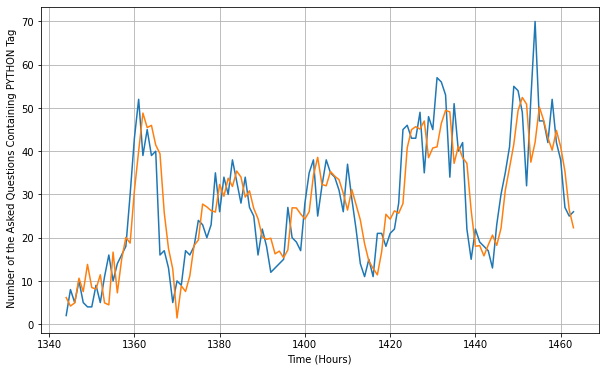

In [ ]:
plt.figure(figsize=(10, 6))
plot_series(time_test, x_test)
plot_series(time_test, rnn_forecast)

In [ ]:
keras.metrics.mean_absolute_error(x_test, rnn_forecast).numpy()

6.090375

## Trend Forecasting with Stateful RNNs


In [ ]:
def sequential_window_dataset(series, window_size):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=window_size, drop_remainder=True)
    ds = ds.flat_map(lambda window: window.batch(window_size + 1))
    ds = ds.map(lambda window: (window[:-1], window[1:]))
    return ds.batch(1).prefetch(1)

In [ ]:
for X_batch, y_batch in sequential_window_dataset(tf.range(10), 3):
    print(X_batch.numpy(), y_batch.numpy())

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


[[[0]
  [1]
  [2]]] [[[1]
  [2]
  [3]]]
[[[3]
  [4]
  [5]]] [[[4]
  [5]
  [6]]]
[[[6]
  [7]
  [8]]] [[[7]
  [8]
  [9]]]


In [ ]:
class ResetStatesCallback(keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs):
        self.model.reset_states()

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 30
train_set = sequential_window_dataset(x_train, window_size)

model = keras.models.Sequential([
  keras.layers.SimpleRNN(100, return_sequences=True, stateful=True,
                         batch_input_shape=[1, None, 1]),
  keras.layers.SimpleRNN(100, return_sequences=True, stateful=True),
  keras.layers.Dense(1),
  keras.layers.Lambda(lambda x: x * 200.0)
])
lr_schedule = keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 30))
reset_states = ResetStatesCallback()
optimizer = keras.optimizers.SGD(learning_rate=1e-8, momentum=0.9)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=100,
                    callbacks=[lr_schedule, reset_states])

Epoch 1/100
40/40 [==============================] - 2s 10ms/step - loss: 75.1449 - mae: 75.6445 - lr: 1.0000e-08
Epoch 2/100
40/40 [==============================] - 1s 18ms/step - loss: 51.4308 - mae: 51.9293 - lr: 1.0798e-08
Epoch 3/100
40/40 [==============================] - 1s 18ms/step - loss: 39.0447 - mae: 39.5418 - lr: 1.1659e-08
Epoch 4/100
40/40 [==============================] - 1s 18ms/step - loss: 36.2011 - mae: 36.6982 - lr: 1.2589e-08
Epoch 5/100
40/40 [==============================] - 1s 17ms/step - loss: 34.8608 - mae: 35.3581 - lr: 1.3594e-08
Epoch 6/100
40/40 [==============================] - 1s 15ms/step - loss: 33.6218 - mae: 34.1180 - lr: 1.4678e-08
Epoch 7/100
40/40 [==============================] - 0s 10ms/step - loss: 32.3430 - mae: 32.8407 - lr: 1.5849e-08
Epoch 8/100
40/40 [==============================] - 0s 10ms/step - loss: 30.9858 - mae: 31.4819 - lr: 1.7113e-08
Epoch 9/100
40/40 [==============================] - 0s 10ms/step - loss: 29.5771 - mae:

(1e-08, 0.0001, 0.0, 30.0)

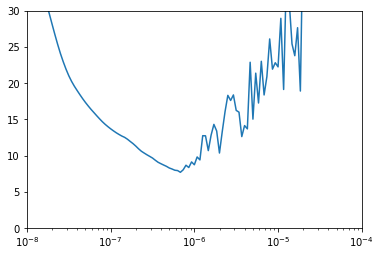

In [ ]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-4, 0, 30])

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 30
train_set = sequential_window_dataset(x_train, window_size)
valid_set = sequential_window_dataset(x_valid, window_size)

model = keras.models.Sequential([
  keras.layers.SimpleRNN(100, return_sequences=True, stateful=True,
                         batch_input_shape=[1, None, 1]),
  keras.layers.SimpleRNN(100, return_sequences=True, stateful=True),
  keras.layers.Dense(1),
  keras.layers.Lambda(lambda x: x * 200.0)
])
optimizer = keras.optimizers.SGD(learning_rate=8*1e-7, momentum=0.9)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
reset_states = ResetStatesCallback()
model_checkpoint = keras.callbacks.ModelCheckpoint(
    "my_checkpoint.h5", save_best_only=True)
early_stopping = keras.callbacks.EarlyStopping(patience=50)
model.fit(train_set, epochs=500,
          validation_data=valid_set,
          callbacks=[early_stopping, model_checkpoint, reset_states])

Epoch 1/500
40/40 [==============================] - 2s 22ms/step - loss: 39.7237 - mae: 40.2208 - val_loss: 26.9108 - val_mae: 27.4040
Epoch 2/500
40/40 [==============================] - 0s 12ms/step - loss: 19.1152 - mae: 19.6093 - val_loss: 16.8450 - val_mae: 17.3397
Epoch 3/500
40/40 [==============================] - 1s 21ms/step - loss: 13.2728 - mae: 13.7646 - val_loss: 14.0727 - val_mae: 14.5565
Epoch 4/500
40/40 [==============================] - 1s 21ms/step - loss: 12.0547 - mae: 12.5466 - val_loss: 13.0445 - val_mae: 13.5371
Epoch 5/500
40/40 [==============================] - 1s 21ms/step - loss: 11.1446 - mae: 11.6350 - val_loss: 12.2820 - val_mae: 12.7716
Epoch 6/500
40/40 [==============================] - 1s 20ms/step - loss: 10.8029 - mae: 11.2932 - val_loss: 11.8138 - val_mae: 12.3081
Epoch 7/500
40/40 [==============================] - 1s 18ms/step - loss: 10.4678 - mae: 10.9546 - val_loss: 11.6235 - val_mae: 12.1124
Epoch 8/500
40/40 [=============================

In [ ]:
model = keras.models.load_model("my_checkpoint.h5")

In [ ]:
rnn_forecast.shape

(120,)

In [ ]:
model.reset_states()
rnn_forecast = model.predict(series[np.newaxis, :, np.newaxis])
rnn_forecast = rnn_forecast[0, (split_time + 5*24 ) - 1:-1, 0]

<ipython-input-115-1f50f5b25ca9>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  rnn_forecast = model.predict(series[np.newaxis, :, np.newaxis])


1/1 [==============================] - 1s 621ms/step


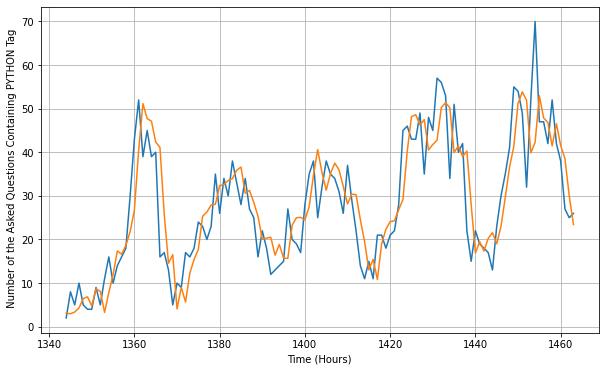

In [ ]:
plt.figure(figsize=(10, 6))
plot_series(time_test, x_test)
plot_series(time_test, rnn_forecast)

In [ ]:
keras.metrics.mean_absolute_error(x_test, rnn_forecast).numpy()

6.1267543

## Trend Forecasting with LSTM




In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 30
train_set = sequential_window_dataset(x_train, window_size)

model = keras.models.Sequential([
  keras.layers.LSTM(100, return_sequences=True, stateful=True,
                    batch_input_shape=[1, None, 1]),
  keras.layers.LSTM(100, return_sequences=True, stateful=True),
  keras.layers.Dense(1),
  keras.layers.Lambda(lambda x: x * 200.0)
])
lr_schedule = keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
reset_states = ResetStatesCallback()
optimizer = keras.optimizers.SGD(learning_rate=1e-8, momentum=0.9)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=100,
                    callbacks=[lr_schedule, reset_states])

Epoch 1/100
40/40 [==============================] - 5s 22ms/step - loss: 13.6193 - mae: 14.1113 - lr: 1.0000e-08
Epoch 2/100
40/40 [==============================] - 1s 21ms/step - loss: 13.3537 - mae: 13.8444 - lr: 1.1220e-08
Epoch 3/100
40/40 [==============================] - 1s 21ms/step - loss: 13.3257 - mae: 13.8168 - lr: 1.2589e-08
Epoch 4/100
40/40 [==============================] - 1s 21ms/step - loss: 13.2647 - mae: 13.7553 - lr: 1.4125e-08
Epoch 5/100
40/40 [==============================] - 1s 21ms/step - loss: 13.1847 - mae: 13.6752 - lr: 1.5849e-08
Epoch 6/100
40/40 [==============================] - 1s 24ms/step - loss: 13.0946 - mae: 13.5854 - lr: 1.7783e-08
Epoch 7/100
40/40 [==============================] - 1s 22ms/step - loss: 12.9976 - mae: 13.4876 - lr: 1.9953e-08
Epoch 8/100
40/40 [==============================] - 1s 22ms/step - loss: 12.8941 - mae: 13.3847 - lr: 2.2387e-08
Epoch 9/100
40/40 [==============================] - 1s 34ms/step - loss: 12.7838 - mae:

(1e-08, 0.0001, 0.0, 30.0)

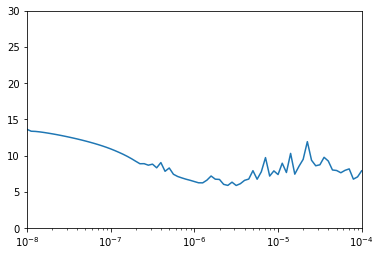

In [ ]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-4, 0, 30])

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 30
train_set = sequential_window_dataset(x_train, window_size)
valid_set = sequential_window_dataset(x_valid, window_size)

model = keras.models.Sequential([
  keras.layers.LSTM(100, return_sequences=True, stateful=True,
                         batch_input_shape=[1, None, 1]),
  keras.layers.LSTM(100, return_sequences=True, stateful=True),
  keras.layers.Dense(1),
  keras.layers.Lambda(lambda x: x * 200.0)
])
optimizer = keras.optimizers.SGD(learning_rate= 5.21e-6, momentum=0.9)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
reset_states = ResetStatesCallback()
model_checkpoint = keras.callbacks.ModelCheckpoint(
    "my_checkpoint.h5", save_best_only=True)
early_stopping = keras.callbacks.EarlyStopping(patience=50)
model.fit(train_set, epochs=500,
          validation_data=valid_set,
          callbacks=[early_stopping, model_checkpoint, reset_states])

Epoch 1/500
40/40 [==============================] - 6s 47ms/step - loss: 23.8638 - mae: 24.3594 - val_loss: 15.4942 - val_mae: 15.9849
Epoch 2/500
40/40 [==============================] - 1s 24ms/step - loss: 9.4672 - mae: 9.9585 - val_loss: 6.7405 - val_mae: 7.2269
Epoch 3/500
40/40 [==============================] - 1s 32ms/step - loss: 6.8059 - mae: 7.2930 - val_loss: 10.0878 - val_mae: 10.5832
Epoch 4/500
40/40 [==============================] - 2s 38ms/step - loss: 7.4312 - mae: 7.9205 - val_loss: 10.6408 - val_mae: 11.1357
Epoch 5/500
40/40 [==============================] - 2s 38ms/step - loss: 7.8718 - mae: 8.3595 - val_loss: 5.7899 - val_mae: 6.2675
Epoch 6/500
40/40 [==============================] - 1s 27ms/step - loss: 5.9978 - mae: 6.4776 - val_loss: 10.2550 - val_mae: 10.7537
Epoch 7/500
40/40 [==============================] - 1s 22ms/step - loss: 6.8979 - mae: 7.3834 - val_loss: 10.0805 - val_mae: 10.5717
Epoch 8/500
40/40 [==============================] - 1s 23ms/ste

In [ ]:
model = keras.models.load_model("my_checkpoint.h5")

In [ ]:
lstm_forecast = model.predict(series[np.newaxis, :, np.newaxis])
lstm_forecast = lstm_forecast[0, (split_time + 5*24) - 1:-1, 0]
#rnn_forecast = rnn_forecast[0, (split_time + 10*24) - 1:-1, 0]

<ipython-input-35-74d169f83d1f>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lstm_forecast = model.predict(series[np.newaxis, :, np.newaxis])


1/1 [==============================] - 0s 217ms/step


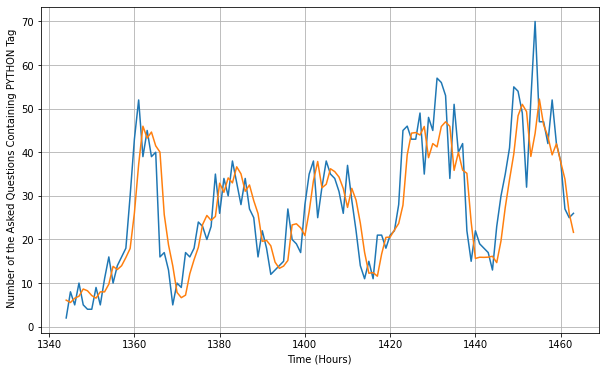

In [ ]:
plt.figure(figsize=(10, 6))
plot_series(time_test, x_test)
plot_series(time_test, lstm_forecast)

In [ ]:
keras.metrics.mean_absolute_error(x_test, lstm_forecast).numpy()

## Trend Forecasting with a CNN model

### Preprocessing With 1D-Convolutional Layers

In [ ]:
def seq2seq_window_dataset(series, window_size, batch_size=32,
                           shuffle_buffer=1000):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 30
train_set = seq2seq_window_dataset(x_train, window_size,
                                   batch_size=128)

model = keras.models.Sequential([
  keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  keras.layers.LSTM(32, return_sequences=True),
  keras.layers.LSTM(32, return_sequences=True),
  keras.layers.Dense(1),
  keras.layers.Lambda(lambda x: x * 200)
])
lr_schedule = keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = keras.optimizers.SGD(learning_rate=1e-8, momentum=0.9)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
10/10 [==============================] - 5s 45ms/step - loss: 41.3035 - mae: 41.8018 - lr: 1.0000e-08
Epoch 2/100
10/10 [==============================] - 1s 46ms/step - loss: 40.8132 - mae: 41.3116 - lr: 1.1220e-08
Epoch 3/100
10/10 [==============================] - 1s 47ms/step - loss: 40.0570 - mae: 40.5553 - lr: 1.2589e-08
Epoch 4/100
10/10 [==============================] - 1s 48ms/step - loss: 39.1247 - mae: 39.6227 - lr: 1.4125e-08
Epoch 5/100
10/10 [==============================] - 1s 46ms/step - loss: 38.0404 - mae: 38.5383 - lr: 1.5849e-08
Epoch 6/100
10/10 [==============================] - 1s 46ms/step - loss: 36.7908 - mae: 37.2888 - lr: 1.7783e-08
Epoch 7/100
10/10 [==============================] - 1s 48ms/step - loss: 35.3461 - mae: 35.8440 - lr: 1.9953e-08
Epoch 8/100
10/10 [==============================] - 1s 59ms/step - loss: 33.6567 - mae: 34.1543 - lr: 2.2387e-08
Epoch 9/100
10/10 [==============================] - 2s 113ms/step - loss: 31.6642 - mae

(1e-08, 0.0001, 0.0, 30.0)

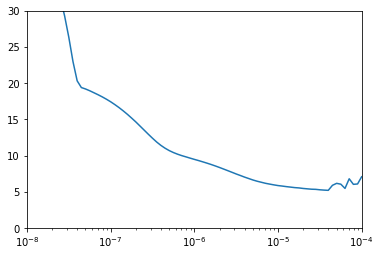

In [ ]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-4, 0, 30])

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 30
train_set = seq2seq_window_dataset(x_train, window_size,
                                   batch_size=128)
valid_set = seq2seq_window_dataset(x_valid, window_size,
                                   batch_size=128)

model = keras.models.Sequential([
  keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  keras.layers.LSTM(32, return_sequences=True),
  keras.layers.LSTM(32, return_sequences=True),
  keras.layers.Dense(1),
  keras.layers.Lambda(lambda x: x * 200)
])
optimizer = keras.optimizers.SGD(learning_rate=4*1e-5, momentum=0.9)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

model_checkpoint = keras.callbacks.ModelCheckpoint(
    "my_checkpoint.h5", save_best_only=True)
early_stopping = keras.callbacks.EarlyStopping(patience=50)
model.fit(train_set, epochs=500,
          validation_data=valid_set,
          callbacks=[early_stopping, model_checkpoint])

Epoch 1/500
10/10 [==============================] - 8s 176ms/step - loss: 34.9861 - mae: 35.4835 - val_loss: 15.1719 - val_mae: 15.6639
Epoch 2/500
10/10 [==============================] - 1s 53ms/step - loss: 15.3637 - mae: 15.8572 - val_loss: 18.5584 - val_mae: 19.0513
Epoch 3/500
10/10 [==============================] - 1s 55ms/step - loss: 10.8481 - mae: 11.3381 - val_loss: 10.3583 - val_mae: 10.8495
Epoch 4/500
10/10 [==============================] - 1s 58ms/step - loss: 7.7850 - mae: 8.2715 - val_loss: 9.6038 - val_mae: 10.0874
Epoch 5/500
10/10 [==============================] - 1s 64ms/step - loss: 6.5462 - mae: 7.0292 - val_loss: 8.4472 - val_mae: 8.9334
Epoch 6/500
10/10 [==============================] - 1s 91ms/step - loss: 6.1667 - mae: 6.6482 - val_loss: 6.6230 - val_mae: 7.1080
Epoch 7/500
10/10 [==============================] - 1s 95ms/step - loss: 5.7154 - mae: 6.1955 - val_loss: 6.5307 - val_mae: 7.0100
Epoch 8/500
10/10 [==============================] - 1s 92ms/s

In [ ]:
model = keras.models.load_model("my_checkpoint.h5")

In [ ]:
rnn_forecast = model.predict(series[np.newaxis, :, np.newaxis])
rnn_forecast = rnn_forecast[0, (split_time + 5*24) - 1:-1, 0]
#rnn_forecast = rnn_forecast[0, (split_time + 10*24) - 1:-1, 0]

<ipython-input-147-d287bb768f15>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  rnn_forecast = model.predict(series[np.newaxis, :, np.newaxis])


1/1 [==============================] - 1s 1s/step


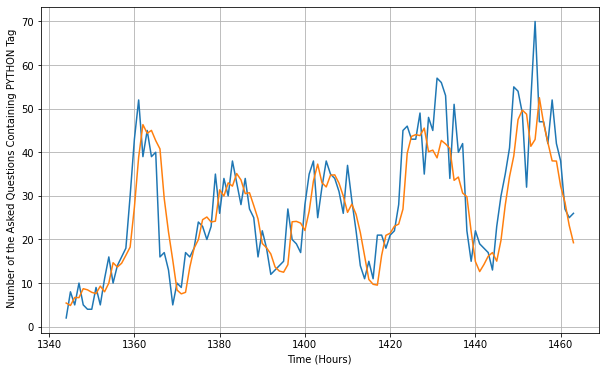

In [ ]:
plt.figure(figsize=(10, 6))
plot_series(time_test, x_test)
plot_series(time_test, rnn_forecast)

In [ ]:
keras.metrics.mean_absolute_error(x_test, rnn_forecast).numpy()

5.9622736

### Fully Convolutional Forecast

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 64
train_set = seq2seq_window_dataset(x_train, window_size,
                                   batch_size=128)

model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=[None, 1]))
for dilation_rate in (1, 2, 4, 8, 16, 32):
    model.add(
      keras.layers.Conv1D(filters=32,
                          kernel_size=2,
                          strides=1,
                          dilation_rate=dilation_rate,
                          padding="causal",
                          activation="relu")
    )
model.add(keras.layers.Conv1D(filters=1, kernel_size=1))
lr_schedule = keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-4 * 10**(epoch / 30))
optimizer = keras.optimizers.Adam(learning_rate=1e-4)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
10/10 [==============================] - 3s 54ms/step - loss: 21.6772 - mae: 22.1753 - lr: 1.0000e-04
Epoch 2/100
10/10 [==============================] - 1s 51ms/step - loss: 21.5110 - mae: 22.0086 - lr: 1.0798e-04
Epoch 3/100
10/10 [==============================] - 1s 51ms/step - loss: 21.3678 - mae: 21.8650 - lr: 1.1659e-04
Epoch 4/100
10/10 [==============================] - 1s 50ms/step - loss: 21.2332 - mae: 21.7296 - lr: 1.2589e-04
Epoch 5/100
10/10 [==============================] - 1s 48ms/step - loss: 21.0725 - mae: 21.5679 - lr: 1.3594e-04
Epoch 6/100
10/10 [==============================] - 1s 52ms/step - loss: 20.8391 - mae: 21.3338 - lr: 1.4678e-04
Epoch 7/100
10/10 [==============================] - 1s 51ms/step - loss: 20.4706 - mae: 20.9643 - lr: 1.5849e-04
Epoch 8/100
10/10 [==============================] - 1s 85ms/step - loss: 19.8631 - mae: 20.3552 - lr: 1.7113e-04
Epoch 9/100
10/10 [==============================] - 1s 58ms/step - loss: 18.8709 - mae:

(0.0001, 0.1, 0.0, 30.0)

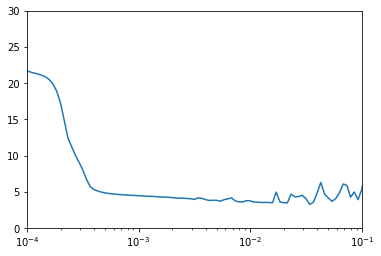

In [ ]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-4, 1e-1, 0, 30])

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 64
train_set = seq2seq_window_dataset(x_train, window_size,
                                   batch_size=128)
valid_set = seq2seq_window_dataset(x_valid, window_size,
                                   batch_size=128)

model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=[None, 1]))
for dilation_rate in (1, 2, 4, 8, 16, 32):
    model.add(
      keras.layers.Conv1D(filters=32,
                          kernel_size=2,
                          strides=1,
                          dilation_rate=dilation_rate,
                          padding="causal",
                          activation="relu")
    )
model.add(keras.layers.Conv1D(filters=1, kernel_size=1))
optimizer = keras.optimizers.Adam(learning_rate=3e-4)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

model_checkpoint = keras.callbacks.ModelCheckpoint(
    "my_checkpoint.h5", save_best_only=True)

early_stopping = keras.callbacks.EarlyStopping(patience=50)

history = model.fit(train_set, epochs=500,
                    validation_data=valid_set,
                    callbacks=[early_stopping, model_checkpoint])

Epoch 1/500
10/10 [==============================] - 4s 115ms/step - loss: 21.1842 - mae: 21.6802 - val_loss: 29.1348 - val_mae: 29.6333
Epoch 2/500
10/10 [==============================] - 1s 59ms/step - loss: 20.6143 - mae: 21.1084 - val_loss: 28.2826 - val_mae: 28.7822
Epoch 3/500
10/10 [==============================] - 1s 61ms/step - loss: 19.8125 - mae: 20.3045 - val_loss: 26.9146 - val_mae: 27.4092
Epoch 4/500
10/10 [==============================] - 1s 62ms/step - loss: 18.5740 - mae: 19.0650 - val_loss: 24.8100 - val_mae: 25.3050
Epoch 5/500
10/10 [==============================] - 1s 63ms/step - loss: 16.7728 - mae: 17.2642 - val_loss: 21.5879 - val_mae: 22.0831
Epoch 6/500
10/10 [==============================] - 1s 64ms/step - loss: 14.5680 - mae: 15.0591 - val_loss: 17.7502 - val_mae: 18.2408
Epoch 7/500
10/10 [==============================] - 1s 60ms/step - loss: 12.9808 - mae: 13.4708 - val_loss: 15.8170 - val_mae: 16.3061
Epoch 8/500
10/10 [============================

In [ ]:
model = keras.models.load_model("my_checkpoint.h5")

In [ ]:
#def model_forecast(model, series, window_size):
#    ds = tf.data.Dataset.from_tensor_slices(series)
#    ds = ds.window(window_size, shift=1, drop_remainder=True)
#    ds = ds.flat_map(lambda w: w.batch(window_size))
#    ds = ds.batch(32).prefetch(1)
#    forecast = model.predict(ds)
#    return forecast

In [ ]:
# cnn_forecast = model_forecast(model, series[..., np.newaxis], window_size)
# cnn_forecast = cnn_forecast[ (split_time + 10*24) - window_size:-1, -1, 0]

In [ ]:
cnn_forecast = model.predict(series[(split_time + 5*24):])
cnn_forecast = cnn_forecast.reshape(-1)

4/4 [==============================] - 0s 8ms/step


## The best performance Model is the Fully Convolutional and It is saved as a".H5" file in order to be called for later predictions on ML, DL & All 3 Tags Trend Predictions.

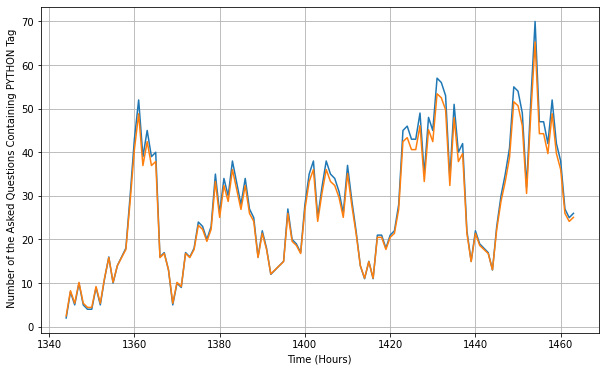

In [ ]:
plt.figure(figsize=(10, 6))
plot_series(time_test, x_test)
plot_series(time_test, cnn_forecast)

In [ ]:
keras.metrics.mean_absolute_error(x_test, cnn_forecast).numpy()

1.2275864

In [ ]:
model.save('STM_Case_2_CNN_Based_BestModel.h5')

In [ ]:
!ls

my_checkpoint	  stack.csv   STM_Case_2_CNN_Based_BestModel.h5
my_checkpoint.h5  stack.xltx  STM_Case_Study_2022.pdf
